<a href="https://colab.research.google.com/github/tugrulguner/codeML_chl1/blob/main/CodeML_Hackathon_Challenge1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superconductor critical temperature prevision

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ozerozdal","key":"9310d22d850e06f680733fc80df8151a"}'}

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
# copy the kaggle.json to folder
! cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle --upgrade

In [ ]:
! kaggle competitions download -c code-ml-2021-challenge-1

 81% 6.00M/7.40M [00:00<00:00, 60.4MB/s]
100% 7.40M/7.40M [00:00<00:00, 68.1MB/s]
  0% 0.00/1.23M [00:00<?, ?B/s]
100% 1.23M/1.23M [00:00<00:00, 20.3MB/s]
  0% 0.00/25.5k [00:00<?, ?B/s]
100% 25.5k/25.5k [00:00<00:00, 22.3MB/s]


In [ ]:
!ls /content

kaggle.json  sample.csv  sample_data  test.csv.zip  train.csv.zip


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
df_train = pd.read_csv('/content/train.csv.zip')
df_train.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,96.227767,69.981422,57.954438,40.098709,0.794201,0.817715,164.155800,40.930889,67.182467,57.118264,677.566667,732.422222,665.961164,726.484049,1.082088,0.911325,287.2,298.644444,120.940105,86.403032,159.00,139.666667,148.368497,130.708055,1.036508,0.987400,130,52.777778,53.987653,48.898989,8250.333333,7720.111111,6704.729022,5899.681451,0.941813,0.792342,9990.0000,4440.000000,4230.657186,4768.655073,...,67.677778,54.456999,55.479925,0.950753,0.750737,83.0,43.700000,34.953906,39.542432,31.233333,34.311111,28.792816,31.494735,1.014146,0.826258,28.300,19.777778,13.270602,14.032854,64.333333,80.444444,40.165977,54.588914,0.677487,0.523756,134.00000,64.888889,60.741712,62.298762,4.00,4.333333,3.779763,4.082370,1.039721,0.858741,3,2.333333,1.414214,1.490712,8.61
1,62.734867,71.459401,37.781947,42.135100,0.898852,0.760256,164.483300,52.455142,67.263768,71.377194,931.800000,1027.551220,841.468958,945.160244,1.290977,1.165819,905.9,384.979268,400.763552,380.700162,133.25,120.792683,114.989454,102.987229,1.254603,1.205963,152,47.195122,66.555898,67.378932,3570.616250,4141.922256,84.837751,49.716659,0.250845,0.101000,13308.7490,4057.545427,5636.841631,6077.456672,...,114.543902,22.194712,18.237192,0.508492,0.302342,349.0,106.402439,143.925745,156.870815,7.915000,9.081707,2.956252,3.040768,0.662100,0.516790,25.140,7.664634,10.207726,10.931975,40.758682,18.974003,0.927561,0.308370,0.409012,0.663524,139.99110,11.948506,58.060141,38.398420,3.25,3.743902,2.783158,3.484330,1.265857,1.161736,4,1.439024,1.479020,1.145628,22.80
2,131.173284,98.276642,113.479841,86.135428,0.561468,0.693145,131.586569,0.206642,65.793284,56.978656,897.550000,901.675000,897.512083,901.646519,0.693105,0.558534,16.5,457.025000,8.250000,7.144710,158.00,150.000000,157.187786,149.401023,0.688011,0.602152,32,63.000000,16.000000,13.856406,13220.000000,10180.000000,11738.909660,9155.097759,0.583304,0.691791,12160.0000,530.000000,6080.000000,5265.434455,...,57.200000,18.342573,5.245366,0.039930,0.096744,222.8,54.950000,111.400000,96.475230,9.925000,8.637500,9.585145,8.393498,0.659103,0.654444,5.150,2.387500,2.575000,2.230015,220.000000,170.000000,195.959179,153.346345,0.585953,0.691416,200.00000,10.000000,100.000000,86.602540,3.50,2.750000,3.162278,2.514867,0.598270,0.689009,3,0.250000,1.500000,1.299038,1.21
3,50.458275,37.642417,32.677538,23.407534,0.364960,0.517533,76.895150,21.628150,38.447575,36.248721,850.550000,928.933333,817.398177,898.

In [ ]:
df_test = pd.read_csv('/content/test.csv.zip')
df_test.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,index
0,86.611119,56.467425,66.432363,36.480694,1.406936,1.370440,141.2506,20.673898,52.623254,51.771103,782.580000,1002.093077,739.690186,935.159708,1.549993,0.912470,810.6,701.222308,281.920140,344.213096,166.200000,116.207692,144.206838,90.371945,1.498667,1.391249,205,37.753846,72.964101,81.412029,5854.485800,3215.769462,1258.762756,69.307636,1.332668,0.994009,8958.571,1997.999769,3545.771655,3856.746370,...,110.317692,61.591882,89.542323,1.419935,0.822737,127.05,76.229231,46.239187,47.376581,9.504400,5.166462,5.190938,1.325677,1.375067,1.124597,15.978,2.802769,5.411676,5.583339,105.805316,93.629697,11.605291,1.048947,0.722338,0.233318,399.97342,89.216457,151.308411,164.504908,2.600000,2.092308,2.491462,2.074393,1.564957,1.258479,2,1.046154,0.800000,0.314915,0
1,92.348480,84.119200,71.916468,69.418308,1.432319,1.438685,141.2506,24.948371,50.825974,44.883208,740.760000,741.971429,693.456186,707.807862,1.537759,1.422035,810.6,247.500000,297.526675,251.463231,179.600000,169.714286,155.133632,152.168124,1.502074,1.458108,205,55.285714,75.242541,65.484380,4600.485800,5846.061286,986.409016,1852.861794,1.269731,0.981032,8958.571,3839.795857,3350.285214,3449.069753,...,82.240000,38.873764,53.631177,1.237240,1.003310,135.97,50.452857,54.868531,52.131633,7.864400,9.360286,4.507761,6.114138,1.391534,1.126284,12.878,5.582571,4.252419,4.302402,92.805316,180.575226,9.407401,27.465099,0.538258,0.250718,399.97342,171.424774,154.016796,190.269777,2.200000,2.142857,2.168944,2.119268,1.594167,1.494365,1,0.571429,0.400000,0.349927,1
2,82.024542,48.401308,68.846824,32.906067,1.668511,1.630002,124.1166,13.560166,37.301144,42.520974,741.233333,1024.047211,704.482658,957.458614,1.735517,0.931543,773.0,751.205263,265.666675,344.076813,166.500000,104.946316,149.929039,83.865464,1.715616,1.645848,171,25.289474,58.059596,69.636540,5505.404833,2650.415211,1476.359134,46.717340,1.513197,1.306391,10278.571,1296.014789,3553.437602,3533.971769,...,108.575737,48.562587,82.609120,1.538031,0.788713,135.97,81.812632,47.675413,49.544445,12.370333,4.516211,6.119473,1.077000,1.395139,1.546157,35.778,1.767526,11.355750,6.183193,100.337763,65.472757,14.596763,0.675346,0.949778,0.502448,399.97342,57.879348,141.745076,138.860517,3.166667,2.316316,2.884499,2.230124,1.694415,1.432127,4,1.078947,1.462494,0.765332,2
3,74.621093,60.185761,53.469421,37.938762,1.648219,1.503164,191.2006,25.223132,60.705921,61.490909,886.728571,1002.352020,812.651618,942.98

# Data Exploration

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   mean_atomic_mass                 15000 non-null  float64
 1   wtd_mean_atomic_mass             15000 non-null  float64
 2   gmean_atomic_mass                15000 non-null  float64
 3   wtd_gmean_atomic_mass            14872 non-null  float64
 4   entropy_atomic_mass              15000 non-null  float64
 5   wtd_entropy_atomic_mass          15000 non-null  float64
 6   range_atomic_mass                15000 non-null  float64
 7   wtd_range_atomic_mass            15000 non-null  float64
 8   std_atomic_mass                  15000 non-null  float64
 9   wtd_std_atomic_mass              15000 non-null  float64
 10  mean_fie                         15000 non-null  float64
 11  wtd_mean_fie                     15000 non-null  float64
 12  gmean_fie         

In [ ]:
df_train.describe()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,15000.000000,15000.000000,15000.000000,14872.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14883.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14883.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14873.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,14874.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14874.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000
mean,594.093448,377.574159,384.641848,423.131663,470.583297,166.539736,337.727855,256.470970,584.854714,457.410707,929.051125,1166.922149,1062.324767,1157.234258,276.457275,315.200094,1055.704227,844.483616,429.683228,792.645461,205.324915,277.575617,583.119670,281.988090,80.792590,323.741908,333.227467,477.709668,447.085794,263.308326,6308.444470,5658.619785,3686.233067,3505.886135,271.856805,417.437052,8956.932604,3055.242473,3759.724580,3847.684390,...,336.940427,335.006396,261.386388,195.503743,139.196174,455.232519,420.651004,402.520135,316.583848,330.416379,300.187496,180.222321,104.271637,215.799962,335.272717,316.419073,417.691221,398.137711,383.481394,307.696450,153.875098,331.011217,561.598181,299.868324,181.506633,473.547837,411.589413,487.080134,512.053380,199.986135,244.952826,470.961544,413.442523,207.646926,328.013981,447.19880,167.232654,254.460598,220.968494,34.357437
std,19299.489971,13851.592650,16089.013123,16317.606173,17784.955601,9725.158443,11983.514390,12795.603122,18486.745011,17905.424714,9293.173145,14980.280290,14336.402282,15011.827978,13282.787505,14807.345061,18693.112376,14651.012934,11029.787336,21333.373948,4148.043467,8540.036173,16410.858166,10119.629598,6879.613673,13707.212208,9407.644758,16403.079872,15534.828812,12816.573437,9144.493775,17016.532440,12612.020299,15445.044343,14138.347112,15969.985560,12909.476240,8259.000487,15

## Missing Values in the Training Set

# New Section

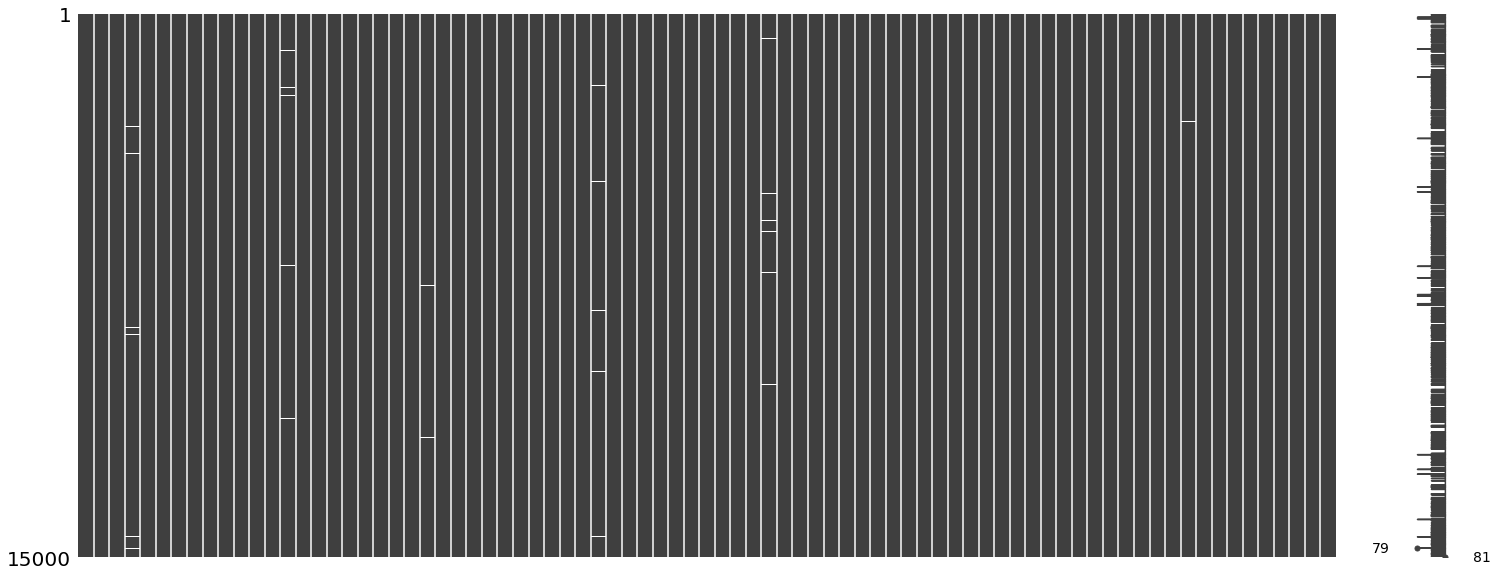

In [ ]:
import missingno as msno

# get the first impression of missing values in the training set
msno.matrix(df_train);

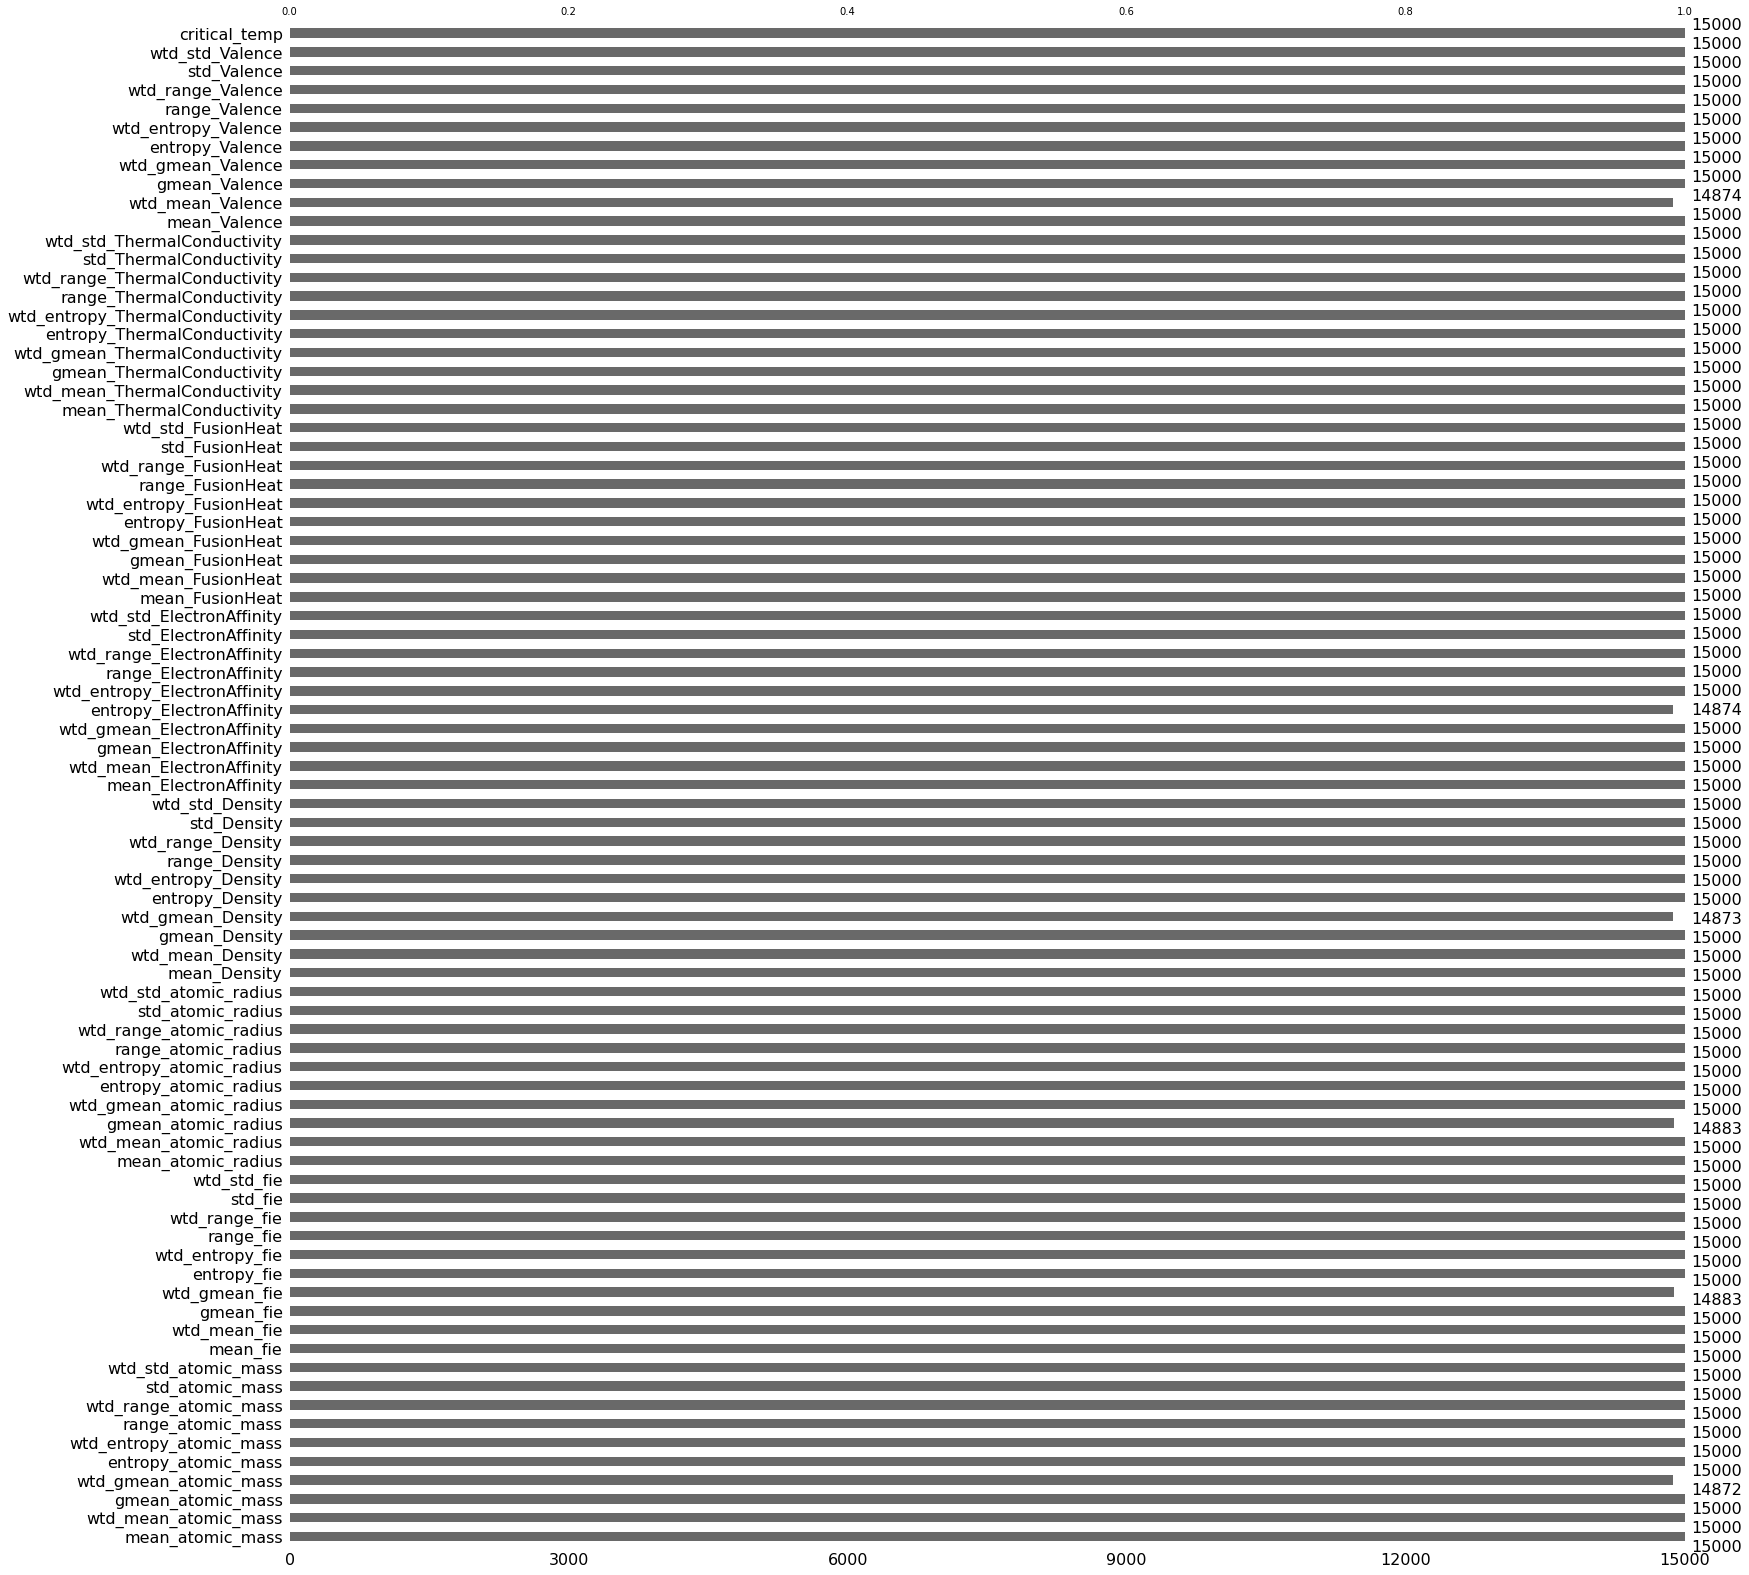

In [ ]:
# Numbers of null values in the training set
msno.bar(df_train);

In [ ]:
# Let's calculate the percentage of null values in the training set
for i in df_train.columns:
    null_rate = df_train[i].isna().sum() / len(df_train) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

wtd_gmean_atomic_mass's null rate :0.85%
wtd_gmean_fie's null rate :0.78%
gmean_atomic_radius's null rate :0.78%
wtd_gmean_Density's null rate :0.85%
entropy_ElectronAffinity's null rate :0.84%
wtd_mean_Valence's null rate :0.84%


### Taking care of missing data (Training Set)

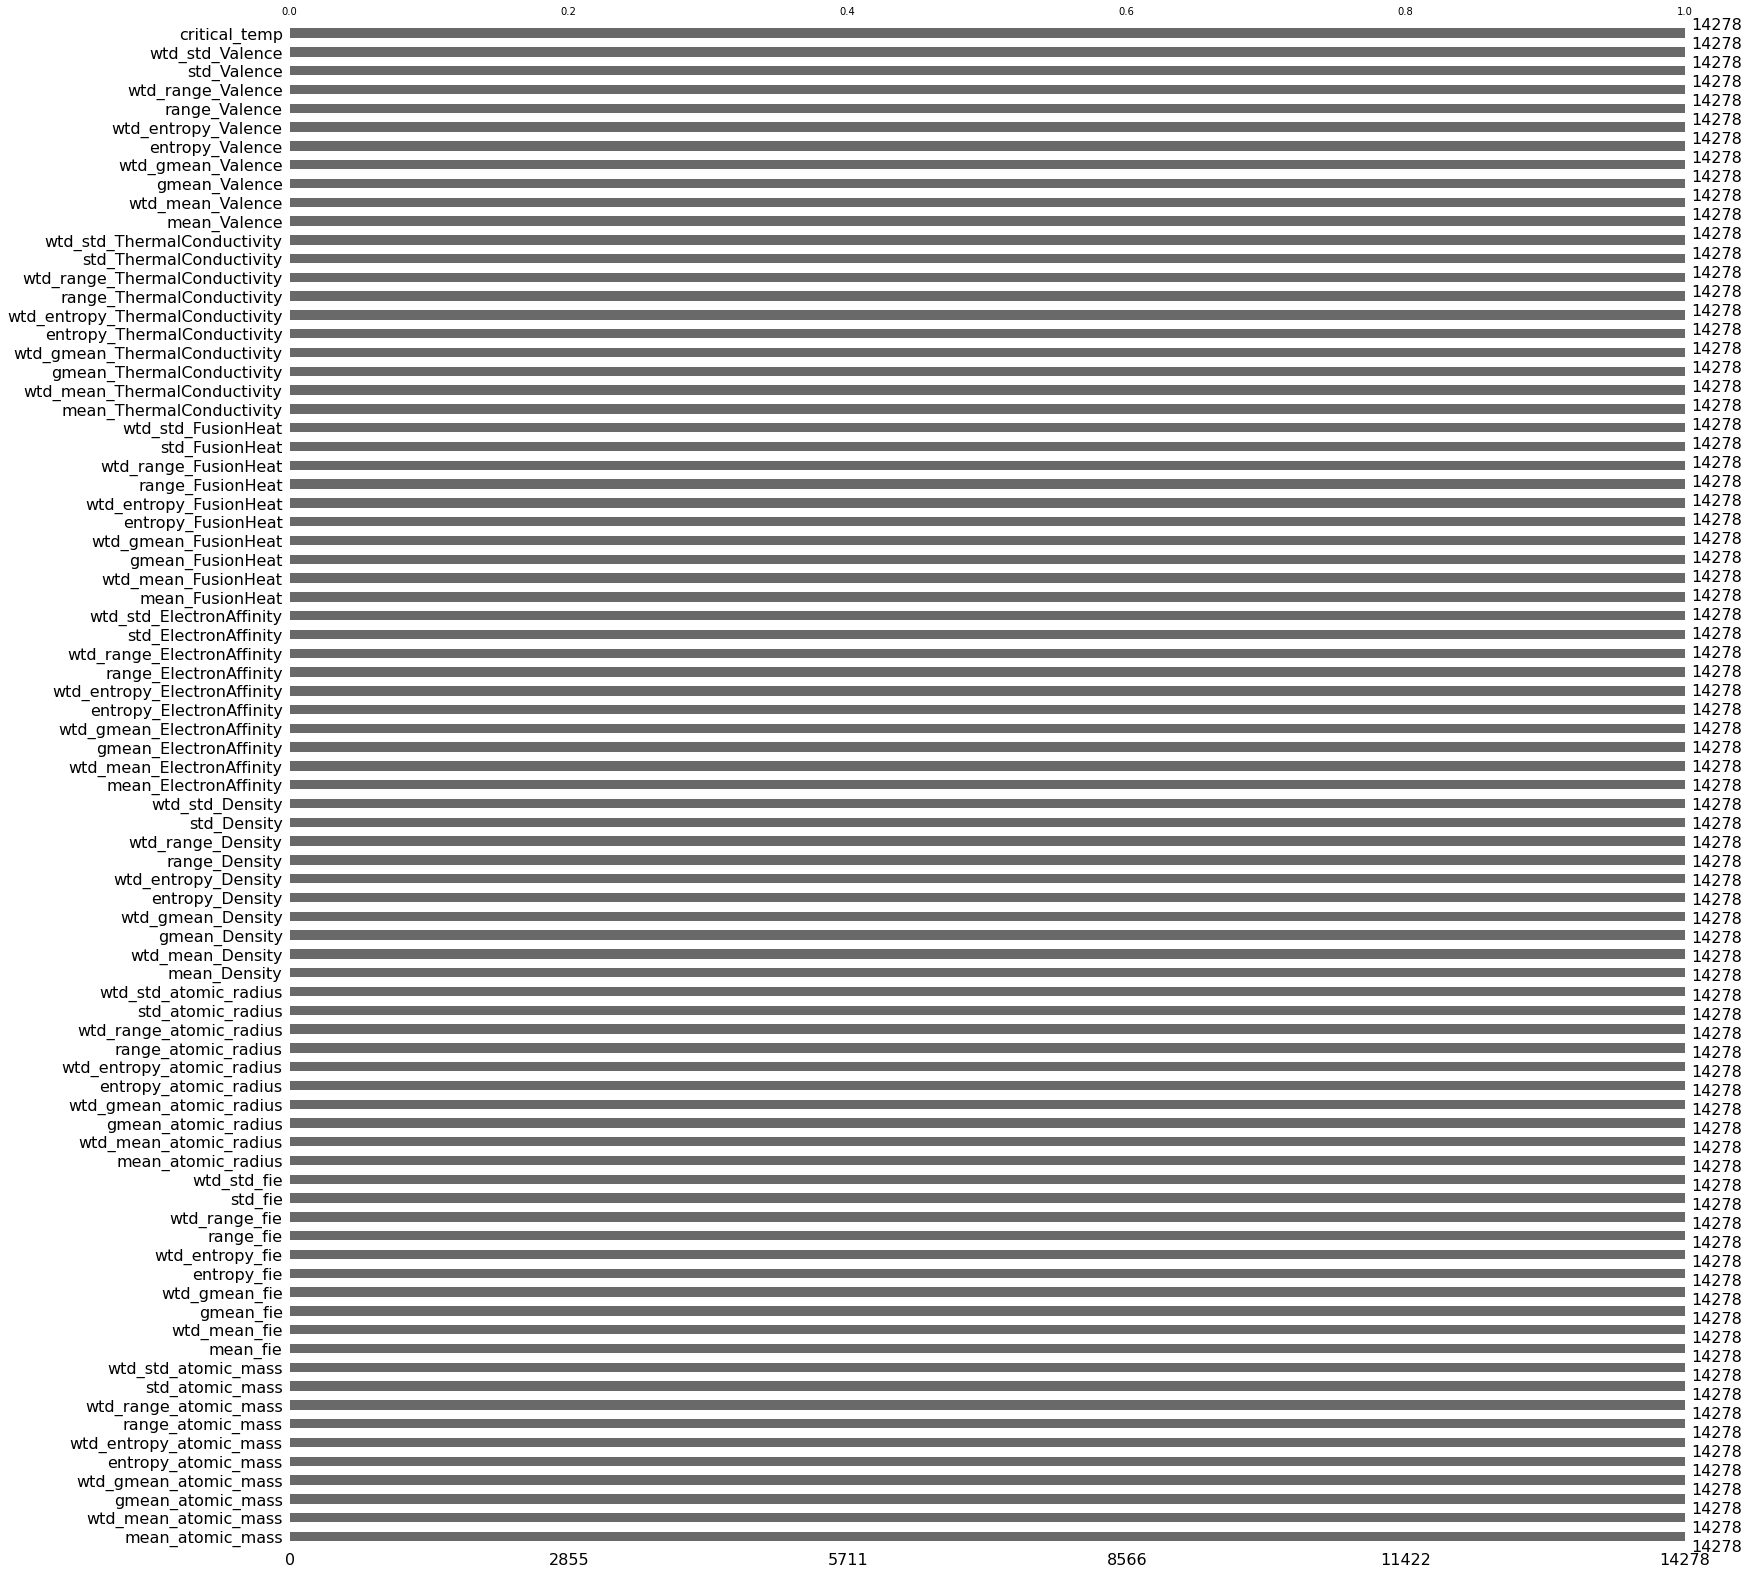

In [ ]:
# As null values are a small portion of the data, let's drop those rows
df_train.dropna(how="any", inplace = True)
msno.bar(df_train); # Last check for null values!

Great! No more null values in the training set! Each feature can be represented as an array of (1,14278)

In [ ]:
# Last check: Let's calculate the percentage of null values in the training set
for i in df_train.columns:
    null_rate = df_train[i].isna().sum() / len(df_train) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))
    elif null_rate == 0 :
        print("{}'s null rate :{}%".format(i, 0))

mean_atomic_mass's null rate :0%
wtd_mean_atomic_mass's null rate :0%
gmean_atomic_mass's null rate :0%
wtd_gmean_atomic_mass's null rate :0%
entropy_atomic_mass's null rate :0%
wtd_entropy_atomic_mass's null rate :0%
range_atomic_mass's null rate :0%
wtd_range_atomic_mass's null rate :0%
std_atomic_mass's null rate :0%
wtd_std_atomic_mass's null rate :0%
mean_fie's null rate :0%
wtd_mean_fie's null rate :0%
gmean_fie's null rate :0%
wtd_gmean_fie's null rate :0%
entropy_fie's null rate :0%
wtd_entropy_fie's null rate :0%
range_fie's null rate :0%
wtd_range_fie's null rate :0%
std_fie's null rate :0%
wtd_std_fie's null rate :0%
mean_atomic_radius's null rate :0%
wtd_mean_atomic_radius's null rate :0%
gmean_atomic_radius's null rate :0%
wtd_gmean_atomic_radius's null rate :0%
entropy_atomic_radius's null rate :0%
wtd_entropy_atomic_radius's null rate :0%
range_atomic_radius's null rate :0%
wtd_range_atomic_radius's null rate :0%
std_atomic_radius's null rate :0%
wtd_std_atomic_radius's 

Great! Another confirmation that there is no more null values in the training set!

## Missing Values in the Test Set

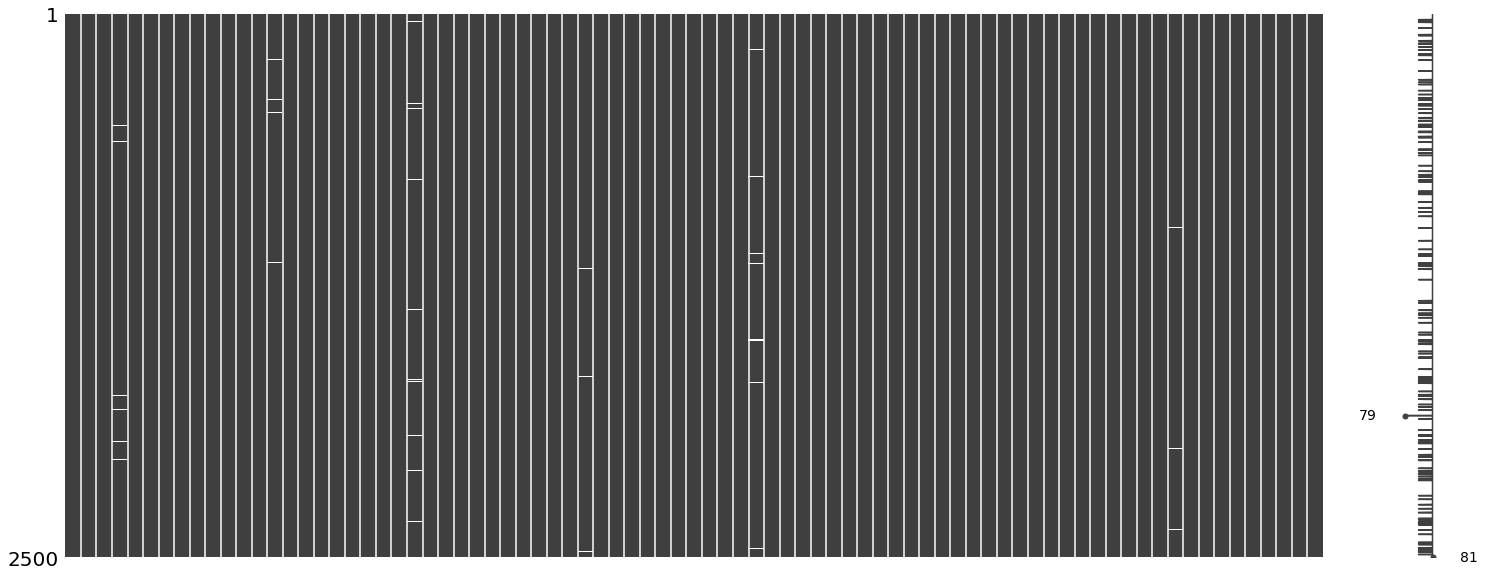

In [ ]:
# get the first impression of missing values in the test set
msno.matrix(df_test);

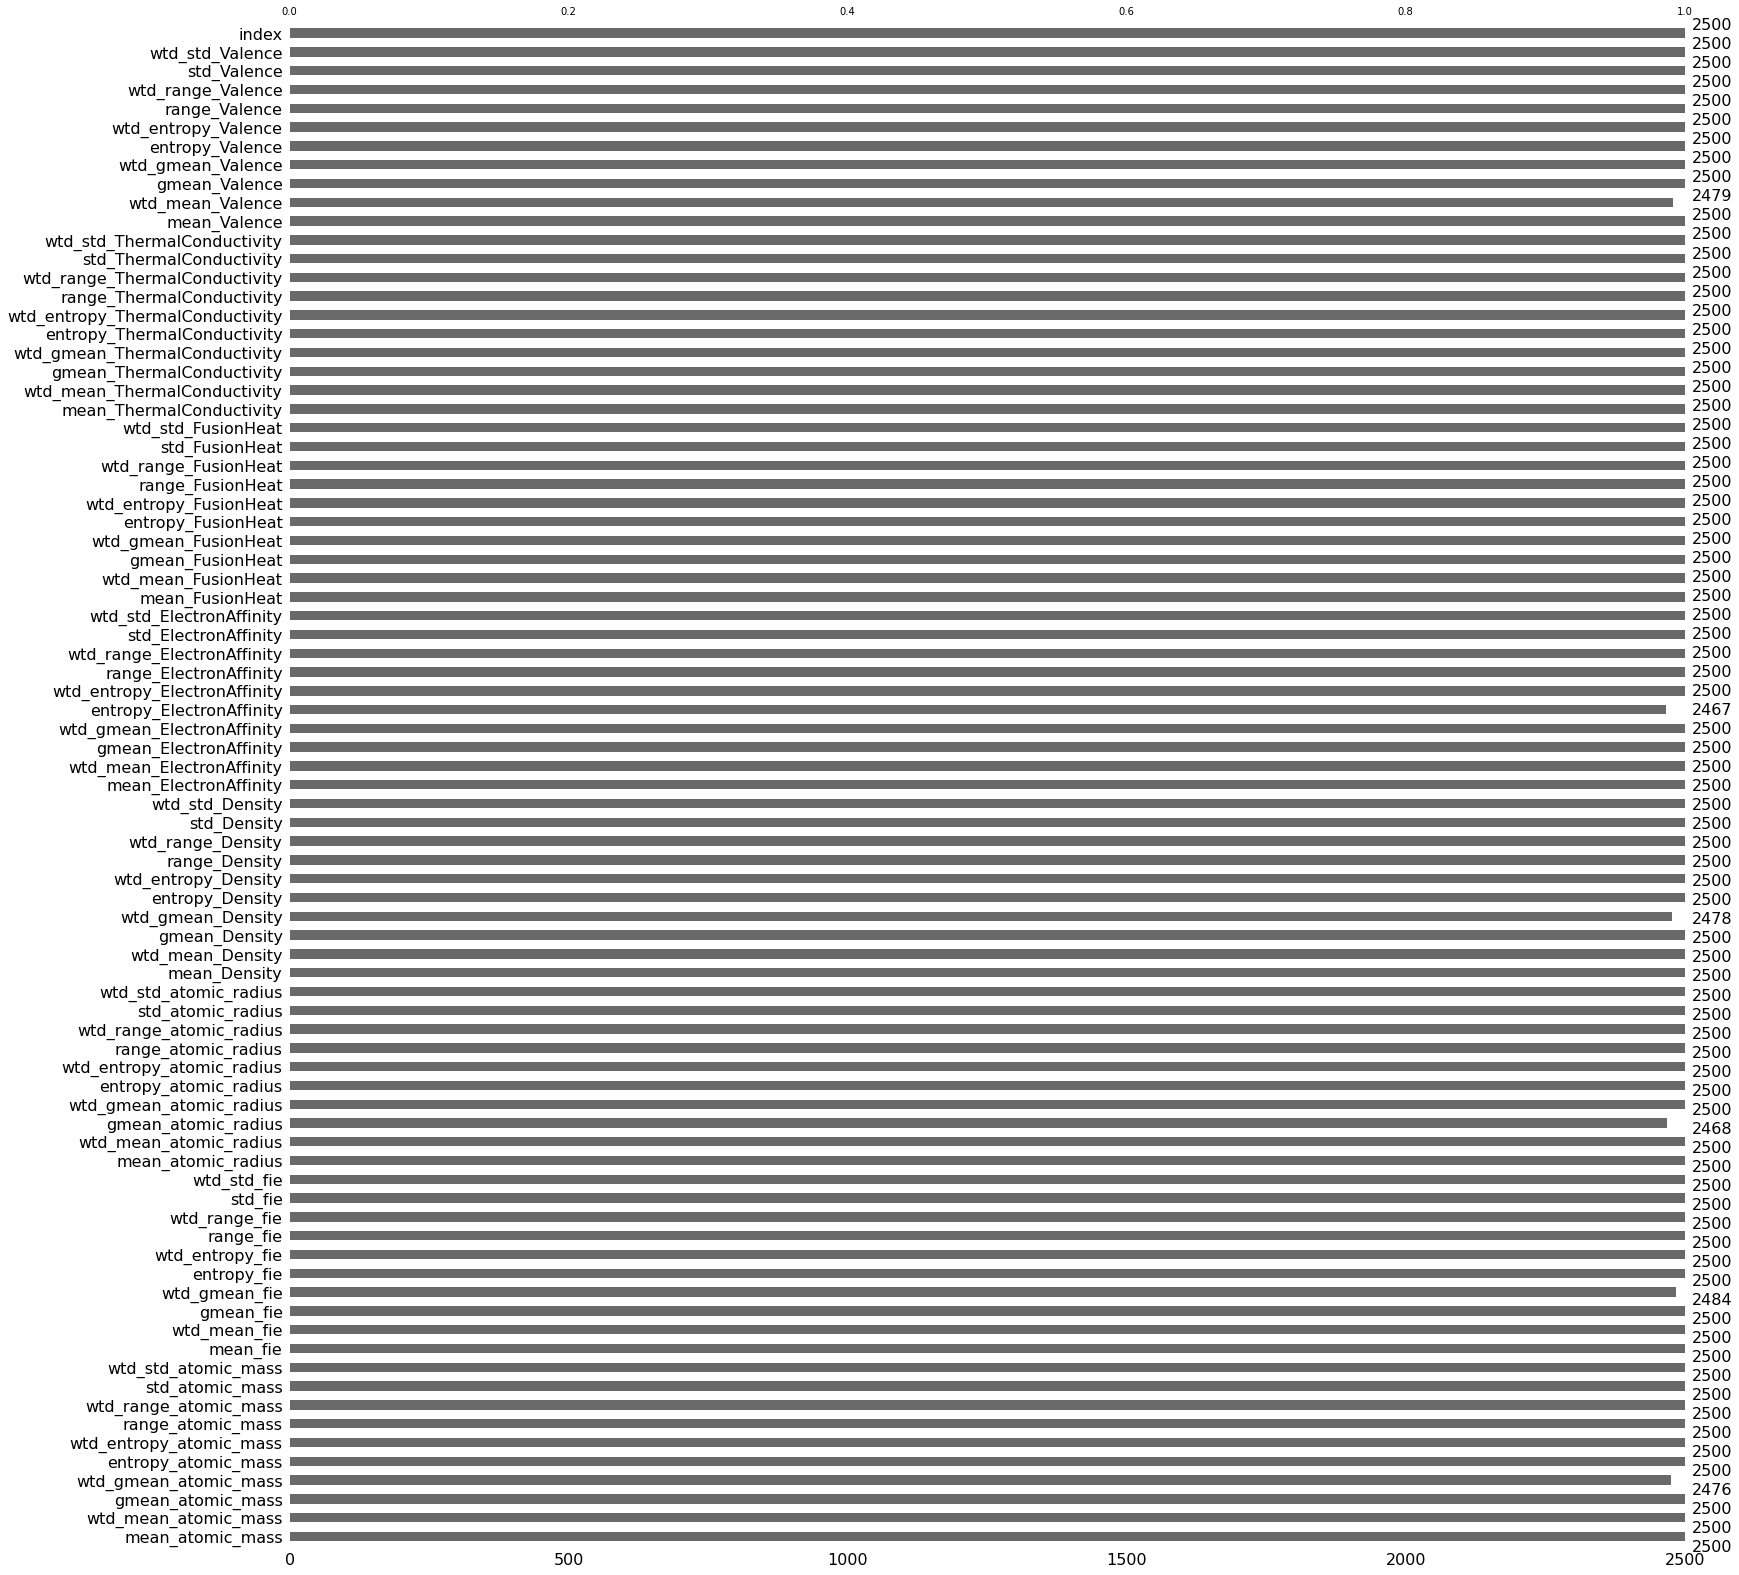

In [ ]:
# Numbers of null values in the test set
msno.bar(df_test);

In [ ]:
# Let's calculate the percentage of null values in the test set
for i in df_test.columns:
    null_rate = df_test[i].isna().sum() / len(df_test) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

wtd_gmean_atomic_mass's null rate :0.96%
wtd_gmean_fie's null rate :0.64%
gmean_atomic_radius's null rate :1.28%
wtd_gmean_Density's null rate :0.88%
entropy_ElectronAffinity's null rate :1.32%
wtd_mean_Valence's null rate :0.84%


### Taking care of missing data (Test Set)

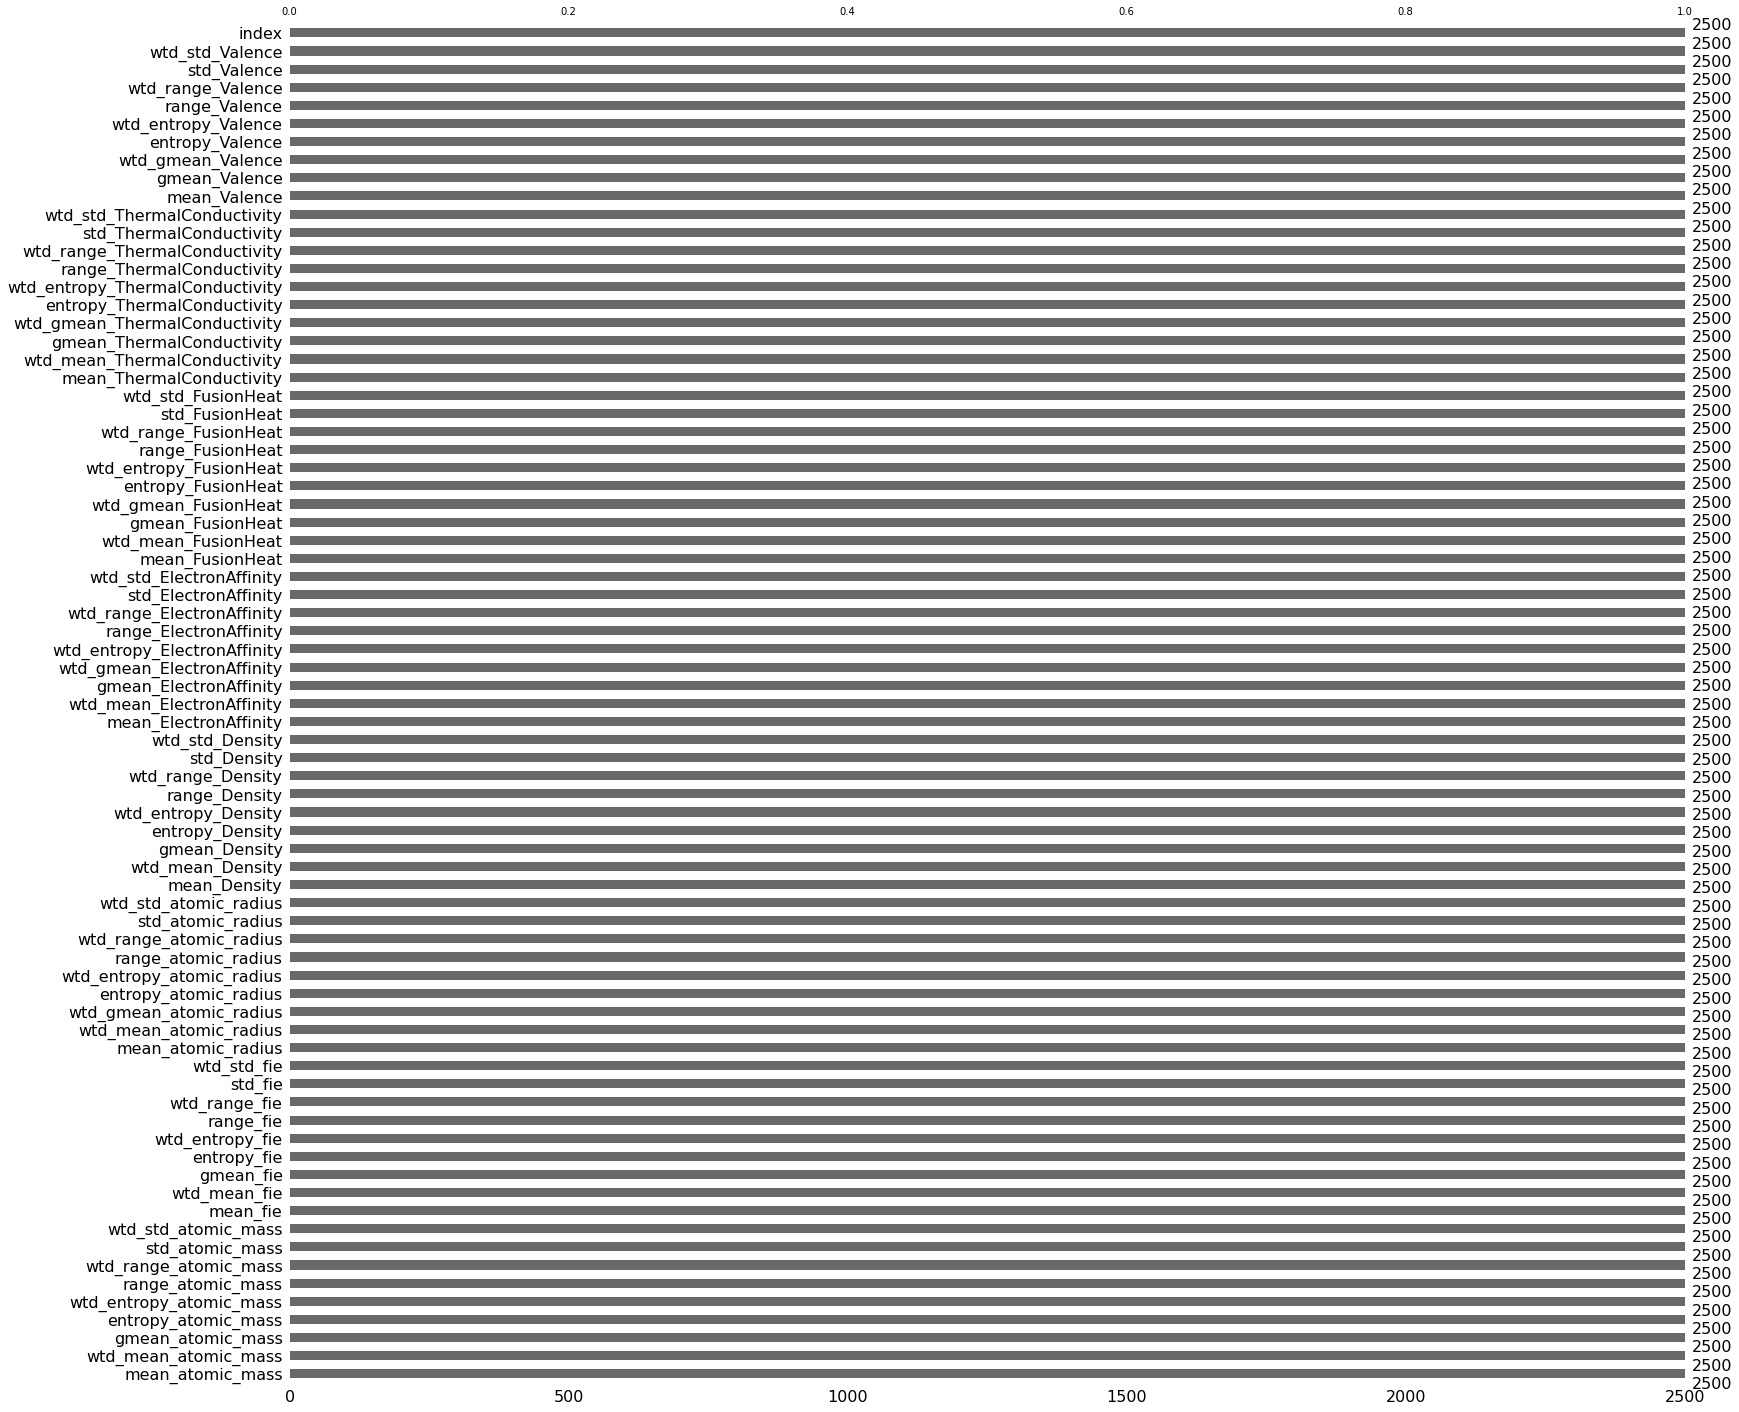

In [ ]:
# As null values are a small portion of the data, let's drop those columns
df_test.drop(['wtd_gmean_atomic_mass', 'wtd_gmean_fie', 'gmean_atomic_radius', 'wtd_gmean_Density',
         'entropy_ElectronAffinity','wtd_mean_Valence'], axis=1, inplace=True)
msno.bar(df_test); # Last check for null values!

Great! No more null values in the test set! Each feature can be represented as an array of (1,2500)

In [ ]:
# Last check: Let's calculate the percentage of null values in the test set
for i in df_test.columns:
    null_rate = df_test[i].isna().sum() / len(df_test) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))
    elif null_rate == 0 :
        print("{}'s null rate :{}%".format(i, 0))

mean_atomic_mass's null rate :0%
wtd_mean_atomic_mass's null rate :0%
gmean_atomic_mass's null rate :0%
entropy_atomic_mass's null rate :0%
wtd_entropy_atomic_mass's null rate :0%
range_atomic_mass's null rate :0%
wtd_range_atomic_mass's null rate :0%
std_atomic_mass's null rate :0%
wtd_std_atomic_mass's null rate :0%
mean_fie's null rate :0%
wtd_mean_fie's null rate :0%
gmean_fie's null rate :0%
entropy_fie's null rate :0%
wtd_entropy_fie's null rate :0%
range_fie's null rate :0%
wtd_range_fie's null rate :0%
std_fie's null rate :0%
wtd_std_fie's null rate :0%
mean_atomic_radius's null rate :0%
wtd_mean_atomic_radius's null rate :0%
wtd_gmean_atomic_radius's null rate :0%
entropy_atomic_radius's null rate :0%
wtd_entropy_atomic_radius's null rate :0%
range_atomic_radius's null rate :0%
wtd_range_atomic_radius's null rate :0%
std_atomic_radius's null rate :0%
wtd_std_atomic_radius's null rate :0%
mean_Density's null rate :0%
wtd_mean_Density's null rate :0%
gmean_Density's null rate :0

Great! Another confirmation that there is no more null values in the test set!

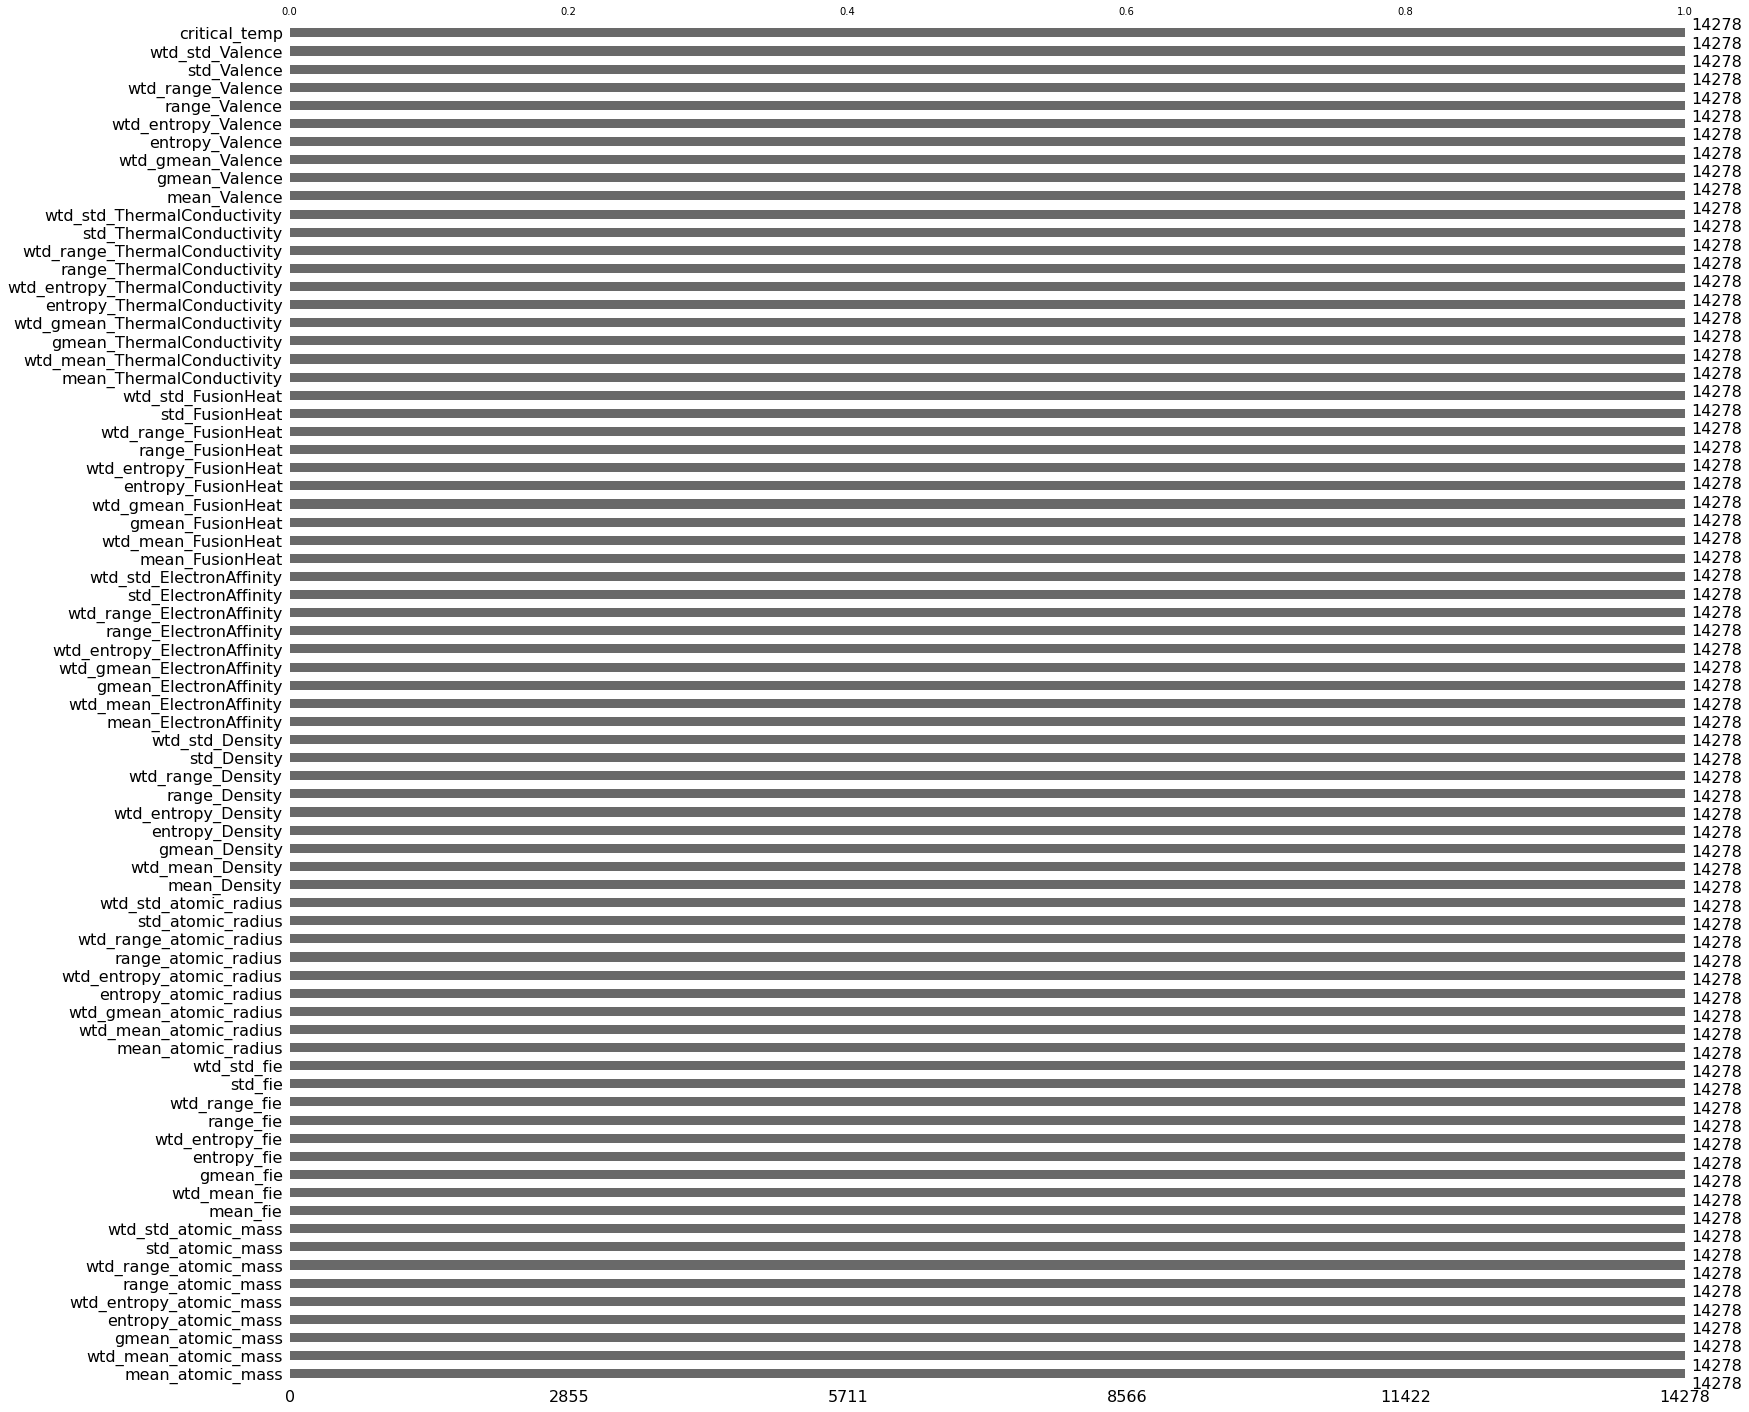

In [ ]:
# Let's drop the same columns from the training set!
df_train.drop(['wtd_gmean_atomic_mass', 'wtd_gmean_fie', 'gmean_atomic_radius', 'wtd_gmean_Density',
         'entropy_ElectronAffinity','wtd_mean_Valence'], axis=1, inplace=True)
msno.bar(df_train); # Last check for null values!

Great!

## Correlations in the Training Set

In [ ]:
# Let's check the absolute values of the correlation matrix
corr_train = df_train.corr().abs()
corr_train

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
mean_atomic_mass,1.000000,0.000527,0.000549,0.000736,0.000417,0.000434,0.000477,0.000787,0.000591,0.000446,0.000584,0.000558,0.000568,0.000547,0.000598,0.000684,0.000478,0.000730,0.000335,0.000466,0.000299,0.000310,0.000648,0.000463,0.000689,0.000682,0.000442,0.000438,0.000105,0.000238,0.000534,0.000705,0.002761,0.000454,0.000165,0.000279,0.000644,0.000558,0.000527,0.000493,0.139688,0.000634,0.000587,0.000603,0.000609,0.000531,0.000617,0.000452,0.000333,0.000479,0.000578,0.000514,0.000682,0.000657,0.000655,0.000484,0.000360,0.000554,0.000792,0.000525,0.000445,0.000461,0.000638,0.000652,0.000649,0.000407,0.000764,0.000642,0.000410,0.000621,0.000750,0.000437,0.000492,0.000424,0.016756
wtd_mean_atomic_mass,0.000527,1.000000,0.000413,0.000511,0.000307,0.000420,0.000377,0.000614,0.000478,0.000498,0.000521,0.000462,0.000364,0.000398,0.000591,0.000509,0.000511,0.000564,0.000163,0.000318,0.000168,0.000210,0.000487,0.000451,0.000466,0.000503,0.000324,0.001932,0.001188,0.000715,0.000334,0.000503,0.003069,0.002025,0.001615,0.001184,0.000482,0.000429,0.000413,0.000370,0.000291,0.000514,0.000440,0.000461,0.000441,0.000392,0.000461,0.000332,0.000248,0.000318,0.000403,0.000395,0.000495,0.000507,0.000505,0.000378,0.000267,0.000393,0.000563,0.000363,0.000318,0.000404,0.000472,0.000478,0.000511,0.000318,0.000555,0.000482,0.000287,0.000453,0.000551,0.000335,0.000331,0.000289,0.005193
gmean_atomic_mass,0.000549,0.000413,1.000000,0.000538,0.000309,0.000335,0.000369,0.000592,0.000443,0.000255,0.000325,0.000390,0.000412,0.000410,0.000208,0.000324,0.000098,0.000467,0.000255,0.000382,0.000259,0.000223,0.000496,0.000305,0.000524,0.000486,0.000319,0.002800,0.001977,0.003224,0.000406,0.000521,0.000285,0.002300,0.000373,0.000225,0.000464,0.000394,0.000375,0.000314,0.000292,0.000433,0.000418,0.000435,0.000446,0.000396,0.000468,0.000350,0.000270,0.000346,0.000427,0.000387,0.000519,0.000496,0.000496,0.000414,0.000368,0.000435,0.000603,0.000389,0.000332,0.000433,0.000495,0.000501,0.000508,0.000307,0.000569,0.000487,0.000296,0.000460,0.000557,0.000332,0.000364,0.000303,0.002718
entropy_atomic_mass,0.000736,0.000511,0.000538,1.000000,0.000427,0.000608,0.000443,0.000832,0.000625,0.000605,0.000635,0.000657,0.000575,0.000546,0.000992,0.000506,0.000769,0.000839,0.000300,0.000433,0.000269,0.000321,0.000653,0.000695,0.000641,0.000739,0.000495,0.001730,0.001752,0.003108,0.000532,0.000724,0.003126,0.006710,0.001354,0.001373,0.000661,0.000561,0.000511,0.000492,0.000381,0.000738,0.000588,0.000637,0.000667,0.000532,0.000616,0.000454,0.00

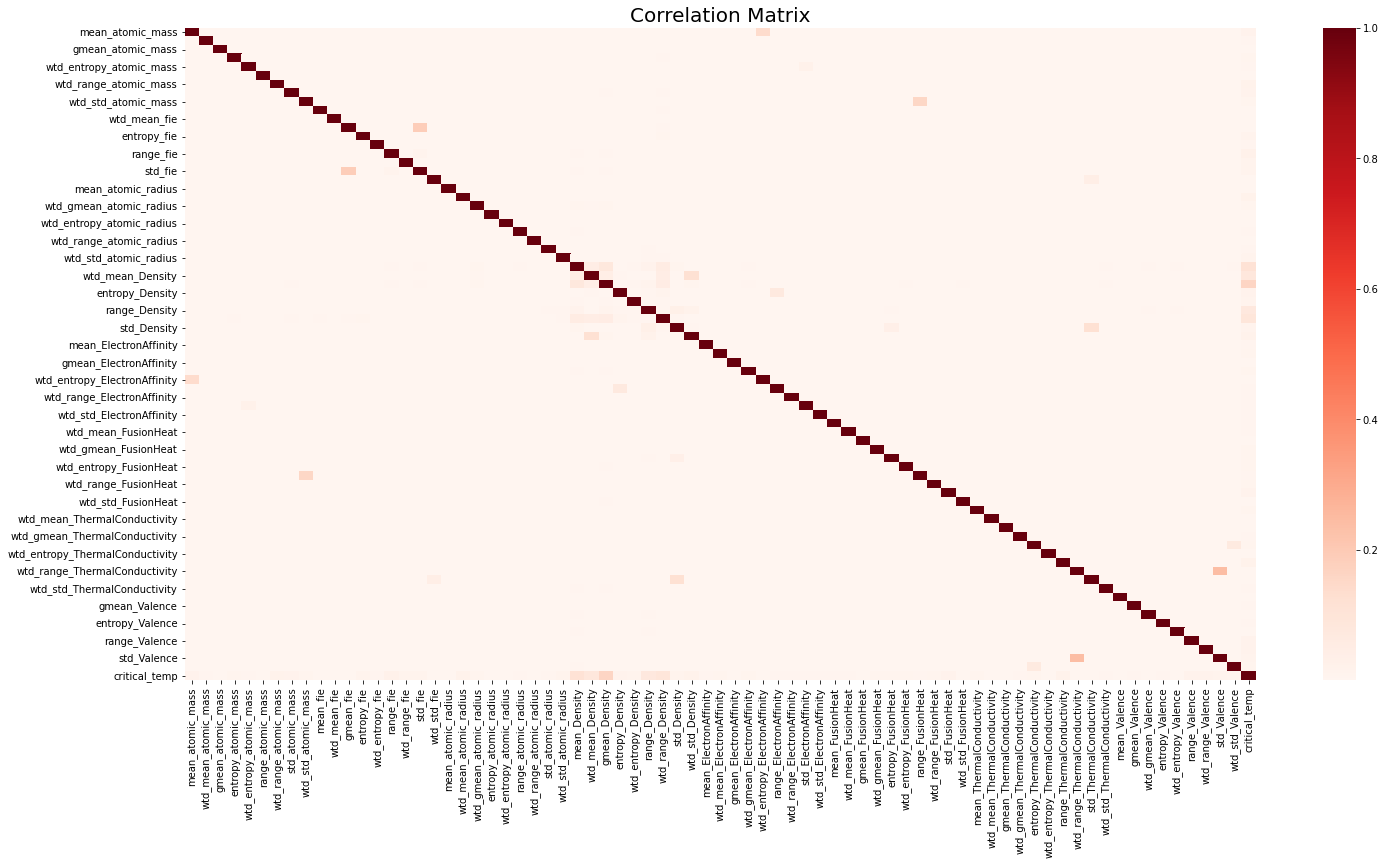

In [ ]:
import seaborn as sns

# Let's visualize the correlation matrix 
plt.rcParams['figure.figsize'] = (24.0, 12.0)
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
ax1 = sns.heatmap(corr_train, annot=False, cmap="Reds")
plt.title("Correlation Matrix", size=20)
plt.show()

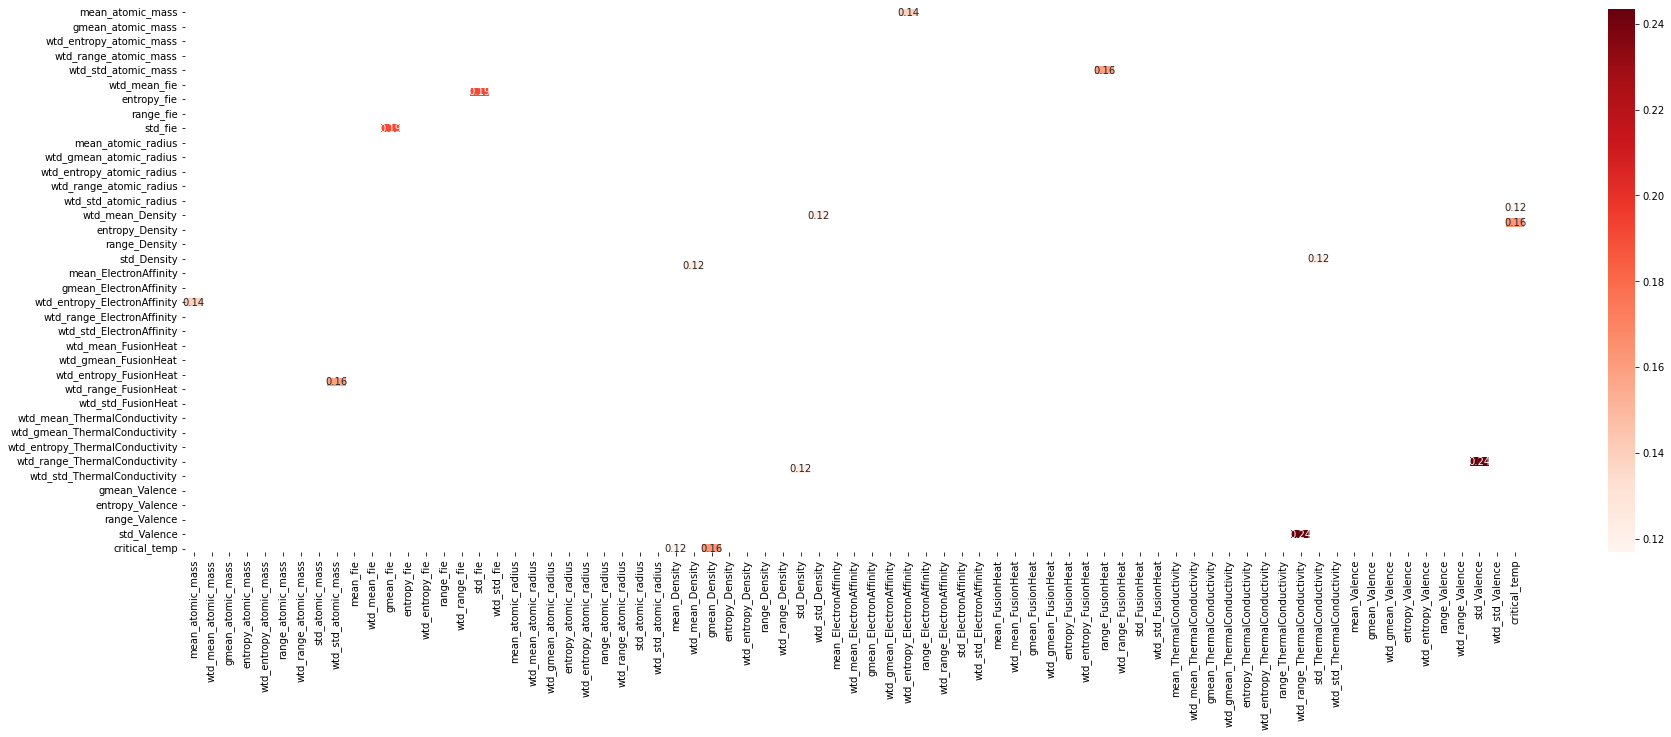

In [ ]:
#Let's simplify the correlation matrix to see the only elements where the correlation is higher than 0.1
#Let's also exclude diagonal elements. 
filteredDf = corr_train[(corr_train >= .1) & (corr_train !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
# A function to create the correlation matrix, filter it, and then flatten it.
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr().abs()
    xFiltered = xCorr[(xCorr >= bound) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values(ascending=False).drop_duplicates()
    return xFlattened

corrFilter(df_train, .1) # correlations higher than 0.1

std_Valence                   wtd_range_ThermalConductivity    0.243589
std_fie                       gmean_fie                        0.190681
critical_temp                 gmean_Density                    0.162329
range_FusionHeat              wtd_std_atomic_mass              0.158633
wtd_entropy_ElectronAffinity  mean_atomic_mass                 0.139688
std_ThermalConductivity       std_Density                      0.123623
wtd_std_Density               wtd_mean_Density                 0.122874
critical_temp                 mean_Density                     0.116825
mean_atomic_mass              mean_atomic_mass                      NaN
dtype: float64

In [ ]:
#Another way to do the same job 
#The matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_train.where(np.triu(np.ones(corr_train.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol.iloc[:10] # Highest 10 correlations

wtd_range_ThermalConductivity  std_Valence                     0.243589
gmean_fie                      std_fie                         0.190681
gmean_Density                  critical_temp                   0.162329
wtd_std_atomic_mass            range_FusionHeat                0.158633
mean_atomic_mass               wtd_entropy_ElectronAffinity    0.139688
std_Density                    std_ThermalConductivity         0.123623
wtd_mean_Density               wtd_std_Density                 0.122874
mean_Density                   critical_temp                   0.116825
wtd_range_Density              critical_temp                   0.091393
wtd_mean_Density               critical_temp                   0.085004
dtype: float64

## Correlations in the Test Set

In [ ]:
# Let's check the absolute values of the correlation matrix
corr_test = df_test.corr().abs()
corr_test

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,index
mean_atomic_mass,1.000000,0.834625,0.012117,0.000867,0.000973,0.003654,0.004784,0.012787,0.016262,0.005846,0.022591,0.195568,0.005806,0.007824,0.003249,0.087067,0.021521,0.005086,0.457311,0.031786,0.344421,0.159502,0.170260,0.028903,0.137735,0.323881,0.006203,0.112225,0.071100,0.142846,0.072502,0.001677,0.134318,0.067033,0.224271,0.013044,0.002757,0.020354,0.003700,0.124717,0.016950,0.021838,0.022076,0.010588,0.004177,0.014009,0.007945,0.021222,0.017675,0.018604,0.010590,0.032802,0.018439,0.020754,0.328196,0.044476,0.000882,0.033469,0.033122,0.008994,0.013425,0.007158,0.007658,0.044895,0.006720,0.015865,0.010757,0.009531,0.010439,0.167638,0.001405,0.002320,0.065489,0.004291,0.012270
wtd_mean_atomic_mass,0.834625,1.000000,0.004048,0.010506,0.011025,0.009692,0.003997,0.012966,0.003674,0.012423,0.004327,0.082521,0.013562,0.012388,0.003415,0.417786,0.016423,0.006751,0.271953,0.019228,0.651916,0.359084,0.418375,0.018740,0.358346,0.545542,0.012794,0.125267,0.086277,0.173828,0.260176,0.010540,0.018867,0.113003,0.078478,0.014434,0.013889,0.000128,0.004790,0.002197,0.001300,0.004848,0.245641,0.010231,0.007763,0.004355,0.009833,0.015584,0.030648,0.004149,0.011457,0.031900,0.010569,0.020368,0.274919,0.026177,0.007128,0.050238,0.038346,0.011867,0.003644,0.010132,0.001391,0.057225,0.001667,0.003075,0.029352,0.008096,0.009653,0.351671,0.010252,0.001828,0.001705,0.014069,0.017557
gmean_atomic_mass,0.012117,0.004048,1.000000,0.000646,0.000630,0.000562,0.000882,0.000611,0.000787,0.000844,0.001490,0.006853,0.000632,0.000640,0.000641,0.023998,0.000877,0.000845,0.012188,0.000539,0.020188,0.010695,0.015253,0.001067,0.024550,0.009036,0.000641,0.000274,0.000227,0.002890,0.018248,0.000631,0.018890,0.000137,0.025897,0.000765,0.000697,0.001306,0.000713,0.045503,0.001058,0.001236,0.034733,0.000845,0.000668,0.000733,0.000604,0.000984,0.000819,0.000838,0.000754,0.000701,0.000624,0.000904,0.002002,0.001045,0.001076,0.000625,0.000551,0.000841,0.001031,0.000954,0.000728,0.000729,0.001144,0.000691,0.000711,0.000624,0.000887,0.011429,0.000629,0.000874,0.040575,0.000578,0.036451
entropy_atomic_mass,0.000867,0.010506,0.000646,1.000000,0.000411,0.000398,0.000602,0.000406,0.000528,0.000610,0.000691,0.014959,0.000412,0.000411,0.000174,0.017717,0.000502,0.000005,0.016160,0.000438,0.017079,0.012581,0.015513,0.000614,0.011485,0.018190,0.000384,0.003053,0.002272,0.003500,0.011912,0.000411,0.000638,0.001915,0.002838,0.000518,0.000427,0.000816,0.000446,0.010525,0.000680,0.000765,0.011433,0.000526,0.000407,0.000506,0.000428,0.000617,0.000576,0.0

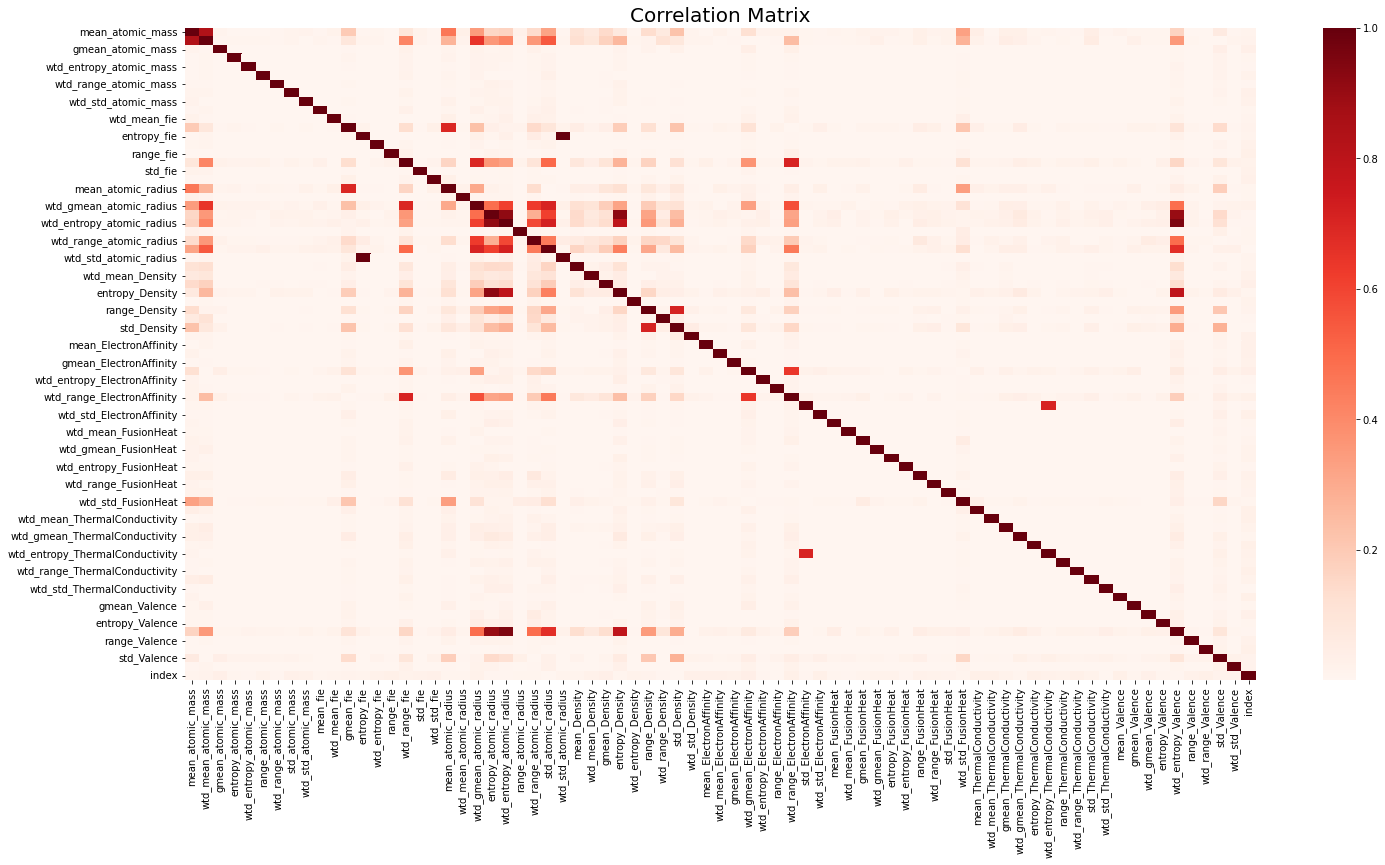

In [ ]:
import seaborn as sns

# Let's visualize the correlation matrix 
plt.rcParams['figure.figsize'] = (24.0, 12.0)
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
ax1 = sns.heatmap(corr_test, annot=False, cmap="Reds")
plt.title("Correlation Matrix", size=20)
plt.show()

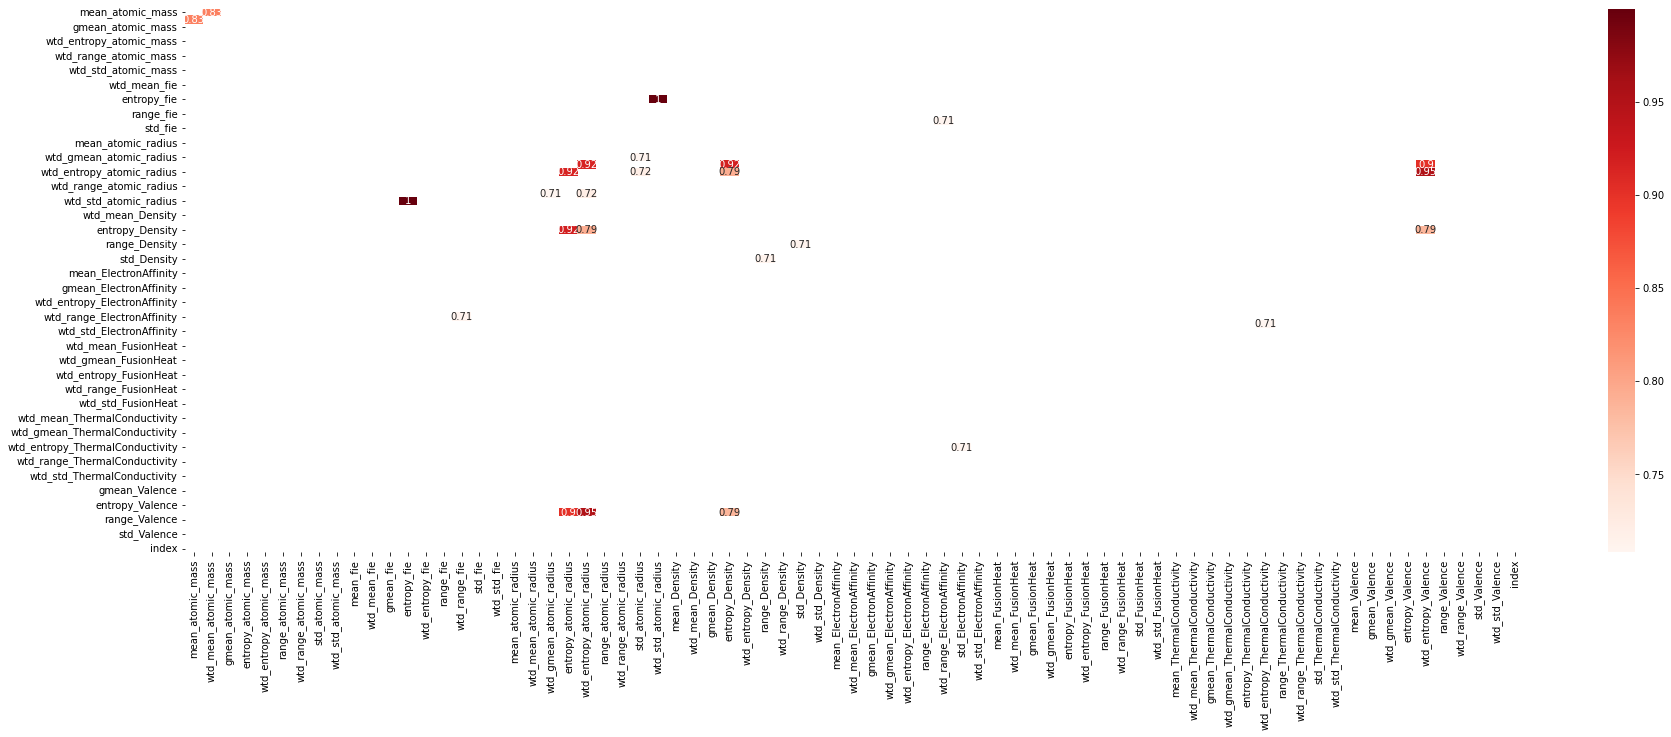

In [ ]:
#Let's simplify the correlation matrix to see the only elements where the correlation is higher than 0.4
#Let's also exclude diagonal elements. 
filteredDf = corr_test[(corr_test >= .7) & (corr_test !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
# A function to create the correlation matrix, filter it, and then flatten it.
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr().abs()
    xFiltered = xCorr[(xCorr >= bound) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values(ascending=False).drop_duplicates()
    return xFlattened

corrFilter(df_test, .6) # correlations higher than 0.6

entropy_fie                      wtd_std_atomic_radius         0.999999
wtd_entropy_Valence              wtd_entropy_atomic_radius     0.953006
entropy_Density                  entropy_atomic_radius         0.919675
entropy_atomic_radius            wtd_entropy_atomic_radius     0.915385
wtd_entropy_Valence              entropy_atomic_radius         0.901423
mean_atomic_mass                 wtd_mean_atomic_mass          0.834625
wtd_entropy_atomic_radius        entropy_Density               0.792595
entropy_Density                  wtd_entropy_Valence           0.786341
std_atomic_radius                wtd_entropy_atomic_radius     0.720960
range_Density                    std_Density                   0.711828
wtd_range_fie                    wtd_range_ElectronAffinity    0.709527
wtd_gmean_atomic_radius          std_atomic_radius             0.708451
wtd_entropy_ThermalConductivity  std_ElectronAffinity          0.708084
mean_atomic_radius               gmean_fie                     0

In [ ]:
#Another way to do the same job 
#The matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_test.where(np.triu(np.ones(corr_test.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol.iloc[:10] # Highest 10 correlations

entropy_fie                wtd_std_atomic_radius        0.999999
wtd_entropy_atomic_radius  wtd_entropy_Valence          0.953006
entropy_atomic_radius      entropy_Density              0.919675
                           wtd_entropy_atomic_radius    0.915385
                           wtd_entropy_Valence          0.901423
mean_atomic_mass           wtd_mean_atomic_mass         0.834625
wtd_entropy_atomic_radius  entropy_Density              0.792595
entropy_Density            wtd_entropy_Valence          0.786341
wtd_entropy_atomic_radius  std_atomic_radius            0.720960
range_Density              std_Density                  0.711828
dtype: float64

## Data Visualization

Text(0, 0.5, 'Critical Temperature')

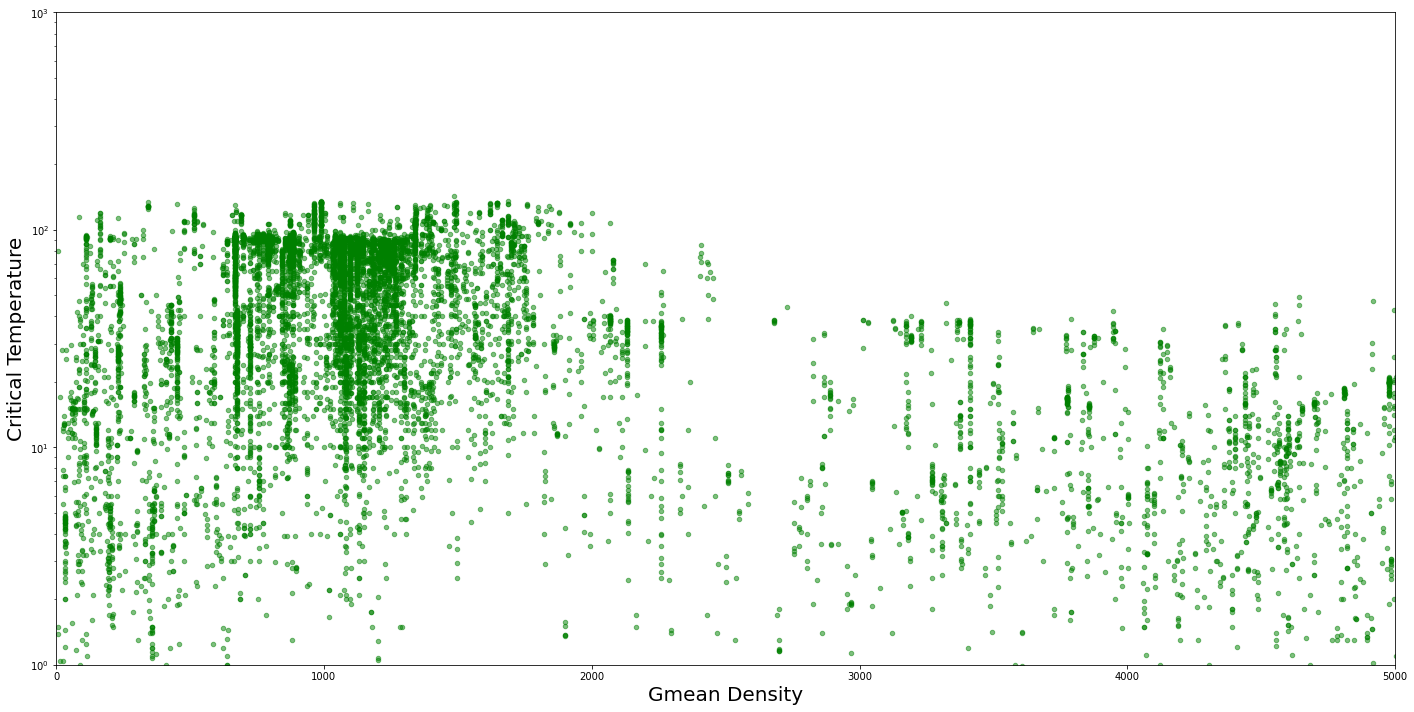

In [ ]:
plt.scatter(df_train.gmean_Density, df_train.critical_temp, s=20, c="g", alpha=0.5, marker='o')
plt.xlim([0,5000])
plt.ylim([1e0,1e3])
plt.yscale('log')
plt.xlabel("Gmean Density", size=20)
plt.ylabel("Critical Temperature", size=20)

Text(0, 0.5, 'gmean_Density')

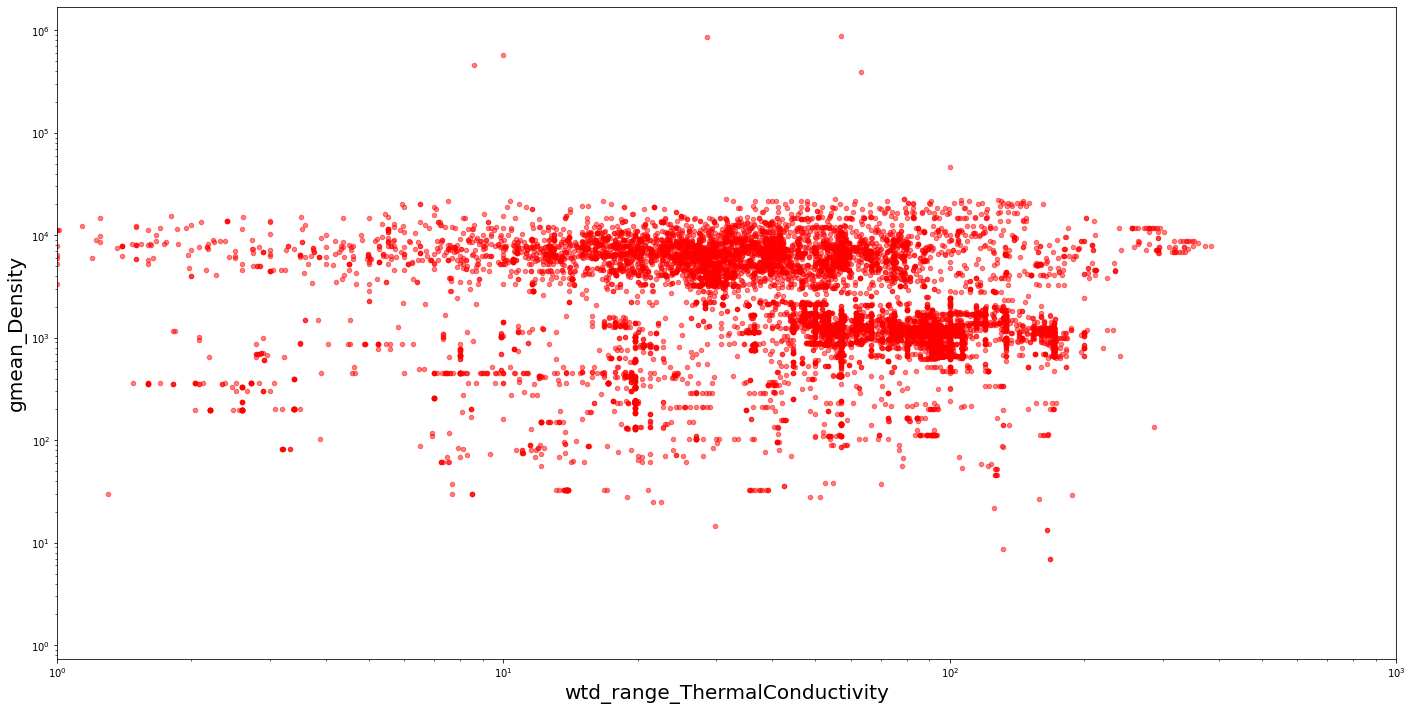

In [ ]:
plt.scatter(df_train.wtd_range_ThermalConductivity, df_train.gmean_Density, s=20, c="r", alpha=0.5, marker='o')
plt.xlim([1e0,1e3])
plt.xscale('log') 
plt.yscale('log')
plt.xlabel("wtd_range_ThermalConductivity", size=20)
plt.ylabel("gmean_Density", size=20)

Text(0, 0.5, 'mean_Valence')

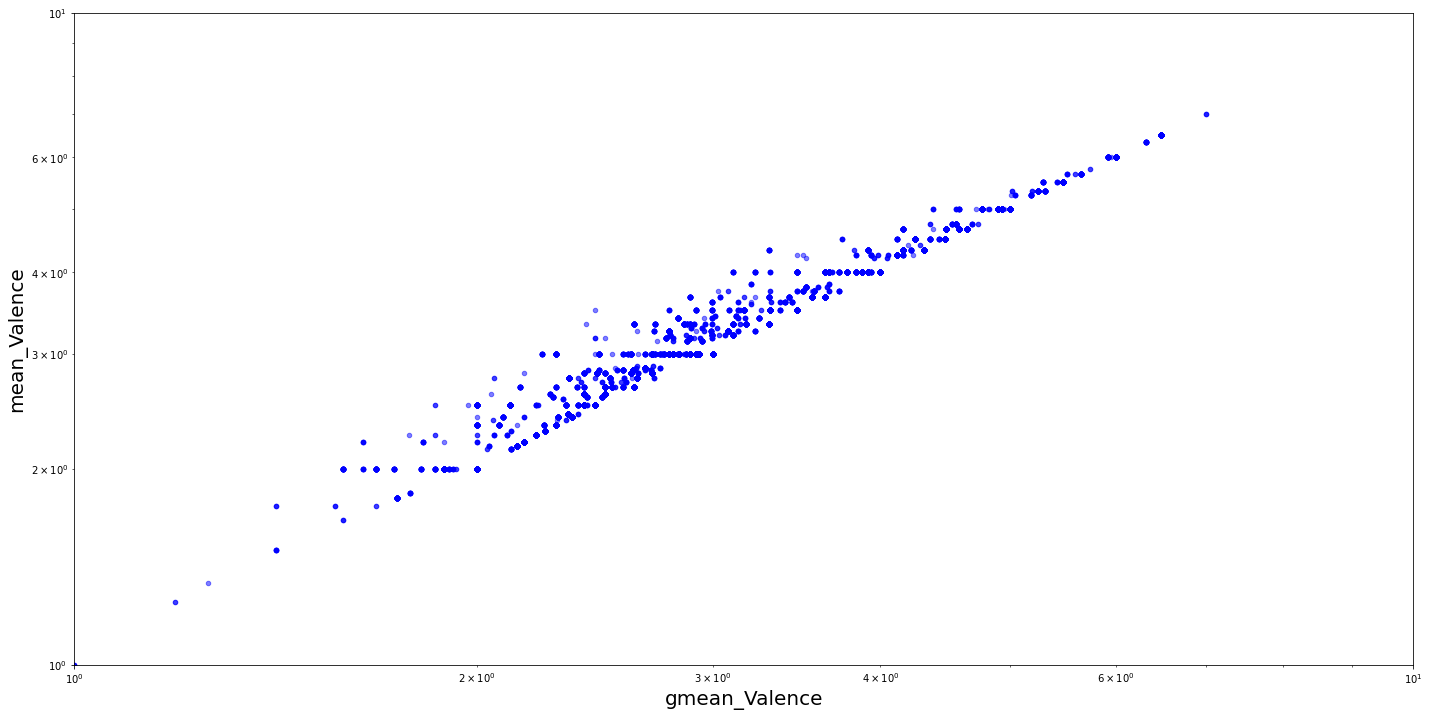

In [ ]:
plt.scatter(df_train.gmean_Valence, df_train.mean_Valence, s=20, c="b", alpha=0.5, marker='o')
plt.xscale('log') 
plt.yscale('log')
plt.xlim([1e0,1e1])
plt.ylim([1e0,1e1])
plt.xlabel("gmean_Valence", size=20)
plt.ylabel("mean_Valence", size=20)

# Splitting the training set into the Training set and (Our Own) Test set

In [ ]:
X = df_train.iloc[:, :-1].values # Select all columns except the last one, which is "critical_temp"
y = df_train.loc[:, ["critical_temp"]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[103.010254   114.09030968  76.29990788 ...   1.55166667   1.16619038
    1.40007043]
 [ 90.2786      55.66186923  66.98998734 ...   0.81538462   0.4330127
    0.3       ]
 [ 74.23165     51.26259462  60.51522055 ...   1.05846154   0.4
    0.26646936]
 ...
 [130.29862667 117.9898925  123.09353932 ...   3.72         0.47140452
    0.4330127 ]
 [ 91.50808     64.6698      64.5702746  ...   0.7826087    0.
    0.        ]
 [ 76.4445625   51.24566538  59.35667247 ...   0.84615385   0.4330127
    0.26646936]]


In [ ]:
print(y_train)

[[ 29.5]
 [ 69. ]
 [ 50.4]
 ...
 [  9.6]
 [105.1]
 [ 89. ]]


In [ ]:
print(X_test)

[[136.92713    177.42622    129.65805991 ...   4.6          0.
    0.        ]
 [ 76.4445625   49.71593667  59.35667247 ...   0.86666667   0.4330127
    0.24944383]
 [ 65.75360386  79.82336099  49.1001207  ...   0.84285714   0.63245553
    0.37498299]
 ...
 [ 83.24476     58.57162587  59.50608142 ...   0.94944189   1.2
    1.0132492 ]
 [ 88.612919    57.94001529  67.25730575 ...   1.02347418   0.8
    0.32617754]
 [110.7555478   95.6301822   58.63454256 ...   0.98360656   1.16619038
    1.25063811]]


In [ ]:
print(y_test)

[[ 4.47]
 [81.6 ]
 [88.4 ]
 ...
 [70.  ]
 [46.  ]
 [10.2 ]]


In [ ]:
# Last check for NaN elements in a NumPy Array in Python
def NaN_Check(array):
  array_sum = np.sum(array)
  array_has_nan = np.isnan(array_sum)
  return array_has_nan

print(NaN_Check(X_train))
print(NaN_Check(y_train))
print(NaN_Check(X_test))
print(NaN_Check(y_test))

False
False
False
False


Great! No NaN values. We are ready to go!

# Multiple Linear Regression model

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = MLR.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[17.38117618  4.47      ]
 [37.54297278 81.6       ]
 [36.36876592 88.4       ]
 ...
 [38.26368473 70.        ]
 [36.91338666 46.        ]
 [31.68986329 10.2       ]]


## Evaluating the Multiple Linear Regression Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

print("Mean absolute error =", round(mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(mean_squared_error(y_test, y_pred), 4)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(r2_score(y_test, y_pred), 2))

Mean absolute error = 27.66
Mean squared error = 1239.9473
Median absolute error = 25.43
Explain variance score = -0.08
R2 score = -0.08


Multiple Linear Regression fails as expected!

#Decision Tree Model


## Training the Decision Tree Regression model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = DTR.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.51        4.47      ]
 [78.40869565 81.6       ]
 [90.2        88.4       ]
 ...
 [86.         70.        ]
 [70.         46.        ]
 [10.65       10.2       ]]


## Evaluating the Decision Tree Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

print("Mean absolute error =", round(mean_absolute_error(y_test, y_pred), 4)) 
print("Mean squared error =", round(mean_squared_error(y_test, y_pred), 4)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_pred), 4)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_pred), 4)) 
print("R2 score =", round(r2_score(y_test, y_pred), 4))

Mean absolute error = 6.85
Mean squared error = 172.5271
Median absolute error = 2.7017
Explain variance score = 0.8499
R2 score = 0.8498


85% R2 score is not bad at all! It's a good start! Let's implement a Random Forest model and see whether we can improve our R2 score!

# Random Forest Regression Model

## Training the Random Forest Regression model on the whole training set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
RF.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = RF.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.2364      4.47      ]
 [78.72379248 81.6       ]
 [84.91333333 88.4       ]
 ...
 [85.11       70.        ]
 [67.57       46.        ]
 [ 8.004      10.2       ]]


## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

print("Mean absolute error =", round(mean_absolute_error(y_test, y_pred), 4)) 
print("Mean squared error =", round(mean_squared_error(y_test, y_pred), 4)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_pred), 4)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_pred), 4)) 
print("R2 score =", round(r2_score(y_test, y_pred), 4))

Mean absolute error = 6.0797
Mean squared error = 120.0534
Median absolute error = 2.6649
Explain variance score = 0.8956
R2 score = 0.8955


R2 score is almost 0.90. Then, Random Forest is definitely better than Decision Tree for our data. Let's increase the n_estimators = 100 and see whether we can get better results.

# Random Forest with n_estimators = 100

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=0)

In [ ]:
y_pred = RF.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.45924     4.47      ]
 [78.38255628 81.6       ]
 [84.50112157 88.4       ]
 ...
 [85.76       70.        ]
 [57.608      46.        ]
 [ 8.11427095 10.2       ]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

print("Mean absolute error =", round(mean_absolute_error(y_test, y_pred), 4)) 
print("Mean squared error =", round(mean_squared_error(y_test, y_pred), 4)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_pred), 4)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_pred), 4)) 
print("R2 score =", round(r2_score(y_test, y_pred), 4))

Mean absolute error = 5.7769
Mean squared error = 109.4325
Median absolute error = 2.4653
Explain variance score = 0.9048
R2 score = 0.9047


As expected, increasing the n_estimators slightly helped us increase R2 score. We will probably need model boosting but first let's implement Support Vector Regression Model.

# Random Forest Grid Search

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
y_pred = grid_search.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.85561923  4.47      ]
 [78.68925639 81.6       ]
 [82.59560608 88.4       ]
 ...
 [82.70356263 70.        ]
 [62.54733283 46.        ]
 [ 8.49219692 10.2       ]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

print("Mean absolute error =", round(mean_absolute_error(y_test, y_pred), 4)) 
print("Mean squared error =", round(mean_squared_error(y_test, y_pred), 4)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_pred), 4)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_pred), 4)) 
print("R2 score =", round(r2_score(y_test, y_pred), 4))

Mean absolute error = 6.1839
Mean squared error = 111.6543
Median absolute error = 2.9573
Explain variance score = 0.9028
R2 score = 0.9028


# Support Vector Regression

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [ ]:
print(X_train)

In [ ]:
print(y_train)

## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
SV_Reg = SVR(kernel = 'rbf')
y_train = np.ravel(y_train) # y is a 2D array. The function np.ravel() flattens the 2D array!
SV_Reg.fit(X_train, y_train)  

## Predicting Test Set Results

In [ ]:
y_train = y_train.reshape(len(y_train),1) # Converting from 1D to 2D array again!

In [ ]:
y_pred_transform = SV_Reg.predict(sc_X.transform(X_test))
y_pred_transform = y_pred_transform.reshape(len(y_pred_transform),1)
y_pred = sc_y.inverse_transform(y_pred_transform)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

print("Mean absolute error =", round(mean_absolute_error(y_test, y_pred), 4)) 
print("Mean squared error =", round(mean_squared_error(y_test, y_pred), 4)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_pred), 4)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_pred), 4)) 
print("R2 score =", round(r2_score(y_test, y_pred), 4))

Wow! R2 score with SVM with default parameters is just 0.35. Lower than my expectations! Maybe the default parameters of the model is not appropriate for our data. We can make Grid Search for SVR parameters but I don't think it's worth doing since it's hard to leverage from 0.35 R2 score to the scale of 0.90.  

# XGBoost Random Forest Regression Model

In [ ]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score

# define the model
XGB = XGBRFRegressor(n_estimators=100, subsample = 0.9, colsample_bynode=0.2)
XGB.fit(X_train, y_train)

## Predicting Test Set Results

In [ ]:
y_pred_transform = XGB.predict(sc_X.transform(X_test))
y_pred_transform = y_pred_transform.reshape(len(y_pred_transform),1)
y_pred = sc_y.inverse_transform(y_pred_transform)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

print("Mean absolute error =", round(mean_absolute_error(y_test, y_pred), 4)) 
print("Mean squared error =", round(mean_squared_error(y_test, y_pred), 4)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_pred), 4)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_pred), 4)) 
print("R2 score =", round(r2_score(y_test, y_pred), 4))

# CatBoost Model

In [ ]:
! pip install catboost
import catboost as cb

In [ ]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
cat = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
        
cat.grid_search(grid, train_dataset)

## Predicting Test Set Results

In [ ]:
y_pred_transform = cat.predict(sc_X.transform(X_test))
y_pred_transform = y_pred_transform.reshape(len(y_pred_transform),1)
y_pred = sc_y.inverse_transform(y_pred_transform)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

print("Mean absolute error =", round(mean_absolute_error(y_test, y_pred), 4)) 
print("Mean squared error =", round(mean_squared_error(y_test, y_pred), 4)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_pred), 4)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_pred), 4)) 
print("R2 score =", round(r2_score(y_test, y_pred), 4))

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state = 0)
gb.fit(X_train, y_train)

In [ ]:
y_pred_transform = gb.predict(sc_X.transform(X_test))
y_pred_transform = y_pred_transform.reshape(len(y_pred_transform),1)
y_pred = sc_y.inverse_transform(y_pred_transform)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

print("Mean absolute error =", round(mean_absolute_error(y_test, y_pred), 4)) 
print("Mean squared error =", round(mean_squared_error(y_test, y_pred), 4)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_pred), 4)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_pred), 4)) 
print("R2 score =", round(r2_score(y_test, y_pred), 4))

# Time to predict for the test data given by Kaggle! (Using RF Grid Search)

In [ ]:
X_test = df_test.iloc[:, :-1].values # Select all columns except the last one, which is "critical_temp"

In [ ]:
y_pred = grid_search.predict(X_test)

#y_pred_transform = cat.predict(sc_X.transform(X_test))
#y_pred_transform = y_pred_transform.reshape(len(y_pred_transform),1)
#y_pred = sc_y.inverse_transform(y_pred_transform)

In [ ]:
print(y_pred)

[69.96259776 78.44863572 46.75995091 ...  5.1354023  78.42040262
  8.25634774]


In [ ]:
len(X_test)

2500

In [ ]:
results = np.concatenate((y_pred.reshape(len(y_pred),1), df_test.index.values.astype(int).reshape(len(df_test),1)),1)
print(results)

[[6.99625978e+01 0.00000000e+00]
 [7.84486357e+01 1.00000000e+00]
 [4.67599509e+01 2.00000000e+00]
 ...
 [5.13540230e+00 2.49700000e+03]
 [7.84204026e+01 2.49800000e+03]
 [8.25634774e+00 2.49900000e+03]]


In [ ]:
df_results = pd.DataFrame(data=results, columns=["critical_temp","index"])
df_results["index"] = df_results["index"].astype(int)
df_results

,critical_temp,index
0,69.962598,0
1,78.448636,1
2,46.759951,2
3,78.085382,3
4,4.637182,4
...,...,...
2495,59.449855,2495
2496,78.740745,2496
2497,5.135402,2497
2498,78.420403,2498


In [ ]:
df_results.to_csv("submission.csv", index = False)